In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def load_eval(path):
    df = pd.read_json(path)
    lowest_time = df['time_secs'][0] + 1e-9 * df['time_nsecs'][0]
    relative_times = df['time_secs'] + 1e-9 * df['time_nsecs'] - lowest_time
    df['relative_time'] = relative_times
    return df

scenario = 'sp.fh_ep.ld_hs.2_hc.15.json'
df_go_alone = load_eval(f'evals/go_alone_only/{scenario}')
df_mpdm_ref = load_eval(f'evals/mpdm_ref/{scenario}')

In [5]:
df_mpdm_ref

time_secs  time_nsecs  robot_pos_x  robot_pos_y  robot_vel_x  \
0     1605086216    23766517     7.464115     8.989226          NaN   
1     1605086216    24236917     7.464115     8.989226          NaN   
2     1605086216    33010959     7.464115     8.989226          2.0   
3     1605086216    45147895     7.491324     8.987926          2.0   
4     1605086216    45476436     7.491324     8.987926          2.0   
...          ...         ...          ...          ...          ...   
2440  1605086236   546180725    12.176779     8.279947          0.0   
2441  1605086236   565967559    12.176779     8.279947          0.0   
2442  1605086236   565996170    12.176779     8.279947          0.0   
2443  1605086236   570452928    12.176779     8.279947          0.0   
2444  1605086236   595874547    12.176779     8.279947          0.0   

      robot_vel_y  robot_state  \
0             NaN          NaN   
1             NaN          NaN   
2             0.0          NaN   
3             0.0          NaN   
4             0.0          NaN   
...           ...          ...   
2440          0.0          NaN   
2441          0.0          NaN   
2442          0.0          NaN   
2443          0.0          NaN   
2444          0.0          NaN   

                                        human_positions  \
0                                                  None   
1     [[10.8955402374, 8.2604455948], [13.8666734695...   
2     [[10.8955402374, 8.2604455948], [13.8666734695...   
3     [[10.8955402374, 8.2604455948], [13.8666734695...   
4     [[10.9452924728, 8.2554702759], [13.9166736603...   
...                                                 ...   
2440  [[13.0485725403, 9.2499990463], [10.0831289291...   
2441  [[12.9985723495, 9.2499990463], [10.0820159912...   
2442  [[12.9485721588, 9.2499990463], [10.0809030533...   
2443  [[12.9485721588, 9.2499990463], [10.0809030533...   
2444  [[12.9485721588, 9.2499990463], [10.0809030533...   

                                       human_velocities  relative_time  
0                                                  None       0.000000  
1     [[1.9900759459000001, -0.1989915967], [2.0, 0....       0.000470  
2     [[1.9900759459000001, -0.1989915967], [2.0, 0....       0.009244  
3     [[1.9900759459000001, -0.1989915967], [2.0, 0....       0.021381  
4     [[1.9900751114, -0.1990002394], [2.0, 0.0], [2...       0.021710  
...                                                 ...            ...  
2440  [[-2.0, 1.7362e-06], [-0.0445230901, -1.999504...      20.522414  
2441  [[-2.0, 1.819e-06], [-0.0445234776, -1.9995044...      20.542201  
2442  [[-2.0, 1.9101e-06], [-0.044523917100000004, -...      20.542230  
2443  [[-2.0, 1.9101e-06], [-0.044523917100000004, -...      20.546686  
2444  [[-2.0, 1.9101e-06], [-0.044523917100000004, -...      20.572108  

[2445 rows x 10 columns]

In [6]:
df_go_alone

time_secs  time_nsecs  robot_pos_x  robot_pos_y  robot_vel_x  \
0     1605104529   766782283          NaN          NaN          NaN   
1     1605104529   769678354          NaN          NaN        2.000   
2     1605104529   789451360          NaN          NaN        2.000   
3     1605104529   790015697     7.491324     8.987926        2.000   
4     1605104529   794451475     7.491324     8.987926        2.000   
...          ...         ...          ...          ...          ...   
1078  1605104538   927076578    15.106942    11.995755        1.625   
1079  1605104538   952807664    15.106942    11.995755        1.625   
1080  1605104538   964397907    15.106942    11.995755        1.625   
1081  1605104538   964451789    15.106942    11.995755        1.625   
1082  1605104538   980014801    15.106942    11.995755        1.625   

      robot_vel_y  robot_state  \
0             NaN          NaN   
1             0.0          NaN   
2             0.0          NaN   
3             0.0          NaN   
4             0.0          NaN   
...           ...          ...   
1078          0.0          NaN   
1079          0.0          NaN   
1080          0.0          NaN   
1081          0.0          NaN   
1082          0.0          NaN   

                                        human_positions  \
0     [[10.8955402374, 8.2604455948], [13.8666734695...   
1     [[10.8955402374, 8.2604455948], [13.8666734695...   
2     [[10.9452924728, 8.2554702759], [13.9166736603...   
3     [[10.9452924728, 8.2554702759], [13.9166736603...   
4     [[10.9452924728, 8.2554702759], [13.9166736603...   
...                                                 ...   
1078  [[29.1950912476, 8.2500009537], [31.919424057,...   
1079  [[29.1950912476, 8.2500009537], [31.919424057,...   
1080  [[29.2450904846, 8.2500009537], [31.9204330444...   
1081  [[29.2950897217, 8.2500009537], [31.9214420319...   
1082  [[29.2950897217, 8.2500009537], [31.9214420319...   

                                       human_velocities  relative_time  
0     [[1.9900759459000001, -0.1989915967], [2.0, 0....       0.000000  
1     [[1.9900759459000001, -0.1989915967], [2.0, 0....       0.002896  
2     [[1.9900751114, -0.1990002394], [2.0, 0.0], [2...       0.022669  
3     [[1.9900751114, -0.1990002394], [2.0, 0.0], [2...       0.023233  
4     [[1.9900751114, -0.1990002394], [2.0, 0.0], [2...       0.027669  
...                                                 ...            ...  
1078  [[2.0, -2.2311e-06], [0.0403538607, 1.99959290...       9.160294  
1079  [[2.0, -2.2311e-06], [0.0403538607, 1.99959290...       9.186025  
1080  [[2.0, -2.3696e-06], [0.0403534472, 1.99959290...       9.197616  
1081  [[2.0, -2.5266e-06], [0.040352962900000004, 1....       9.197670  
1082  [[2.0, -2.5266e-06], [0.040352962900000004, 1....       9.213233  

[1083 rows x 10 columns]

In [107]:
def plot_robot_speed(df):
    vels_times = df[['robot_vel_x', 'robot_vel_y', 'relative_time']].dropna()
    robot_vel_x = vels_times['robot_vel_x']
    robot_vel_y = vels_times['robot_vel_y']
    time = vels_times['relative_time']
    
    robot_speed = (robot_vel_x**2 + robot_vel_y**2)**0.5
    return sns.lineplot(x=time, y=robot_speed)

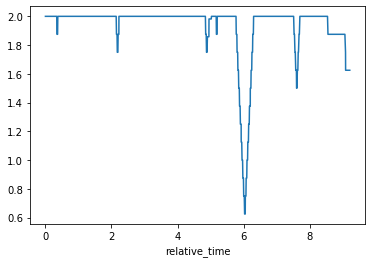

In [108]:
plot_robot_speed(df_go_alone)

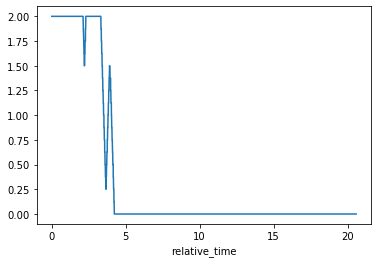

In [109]:
plot_robot_speed(df_mpdm_ref)

In [17]:
def plot_force(df):
    df = df[['human_positions', 'robot_pos_x', 'robot_pos_y', 'relative_time']].dropna()
    force_magnitudes = list()
    for index, row in df.iterrows():
        robot_pos_x = row['robot_pos_x']
        robot_pos_y = row['robot_pos_y']
        robot_pos = np.array([robot_pos_x, robot_pos_y])
        human_positions = row['human_positions']
        human_positions = np.array([np.array([p[0], p[1]]) for p in human_positions])
        distances = np.linalg.norm(robot_pos - human_positions, axis=1)
        closest_distance = np.min(distances)
        force_magnitude = np.exp(-closest_distance**2 / 5)
        force_magnitudes.append(force_magnitude)
    force_magnitudes = pd.Series(force_magnitudes)
    return sns.lineplot(x=df['relative_time'], y=force_magnitudes)

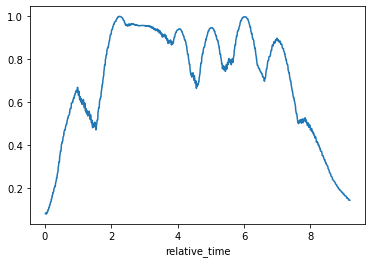

In [111]:
plot_force(df_go_alone)

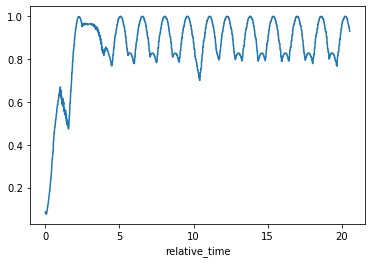

In [112]:
plot_force(df_mpdm_ref)

In [9]:
def sigmoid(x):
    return 1 - math.erf(x) #1 / (1 + np.exp(-x))

def closest_point_on_line_segment_to_point(end1, end2, point):
    l2 = np.linalg.norm(end1 - end2)**2
    if np.abs(l2) < 1e-6:
        return end1
    t = max(0, min(1, np.dot(point - end1, end2 - end1) / l2))
    projection = end1 + t * (end2 - end1)
    return projection

def plot_blame(df):
    df = df[['robot_pos_x', 'robot_pos_y', 'robot_vel_x', 'robot_vel_y', 'human_positions', 'relative_time']].dropna()
    blames = list()
    for index, row in df.iterrows():
        robot_pos_x = row['robot_pos_x']
        robot_pos_y = row['robot_pos_y']
        robot_vel_x = row['robot_vel_x']
        robot_vel_y = row['robot_vel_y']
        human_positions = row['human_positions']
        time = row['relative_time']
        
        robot_pos = np.array([robot_pos_x, robot_pos_y])
        robot_vel = np.array([robot_vel_y, robot_vel_y])
        human_positions = np.array([np.array([p[0], p[1]]) for p in human_positions])

        distances = np.linalg.norm(robot_pos - human_positions, axis=1)
        nearest_human_pos = human_positions[np.argmin(distances)]
        
        endpoint1 = robot_pos
        endpoint2 = robot_pos + robot_vel * 0.5
        p_robot_human_star = closest_point_on_line_segment_to_point(endpoint1, endpoint2, nearest_human_pos)
        blame_human = sigmoid(np.linalg.norm(p_robot_human_star - nearest_human_pos))
        blames.append(blame_human)
        
    blames = pd.Series(blames)
    print(blames.describe())
    sns.lineplot(x=df['relative_time'], y=blames)

count    1.080000e+03
mean     2.136132e-01
std      2.290414e-01
min      4.415452e-07
25%      1.066748e-02
50%      1.217820e-01
75%      3.840458e-01
max      9.644925e-01
dtype: float64


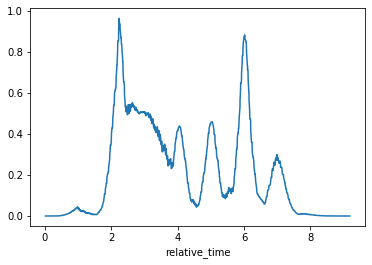

In [10]:
plot_blame(df_go_alone)

count    2.443000e+03
mean     3.614161e-01
std      2.690255e-01
min      4.137064e-07
25%      1.546579e-01
50%      2.673722e-01
75%      5.462795e-01
max      9.671039e-01
dtype: float64


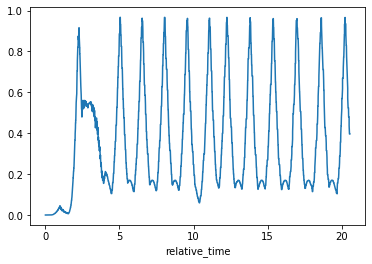

In [11]:
plot_blame(df_mpdm_ref)

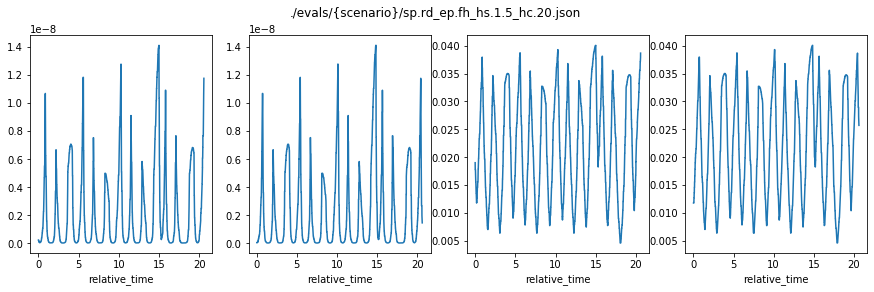

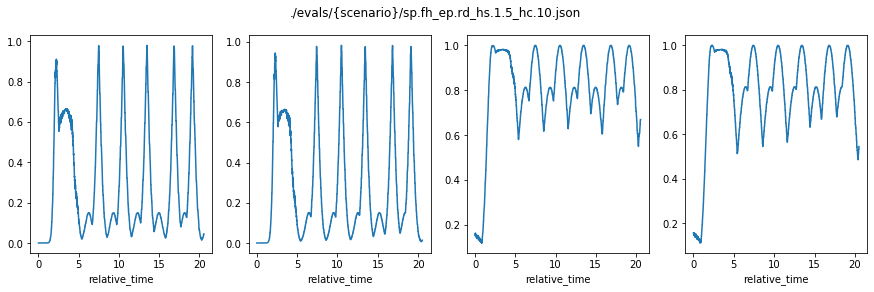

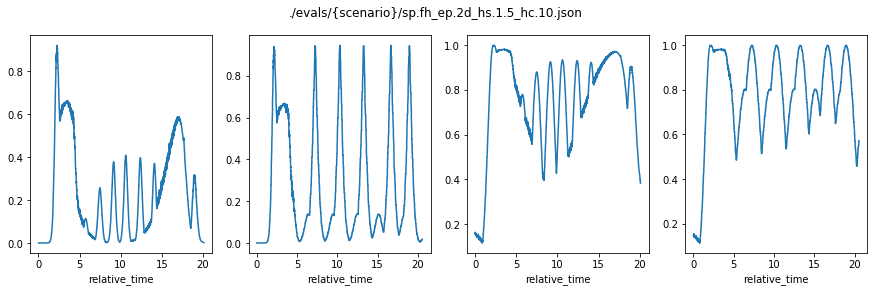

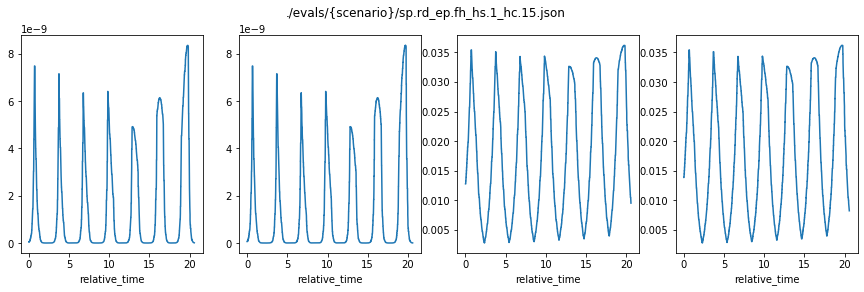

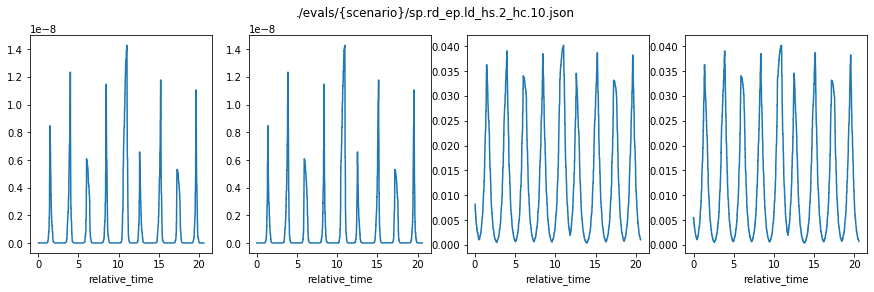

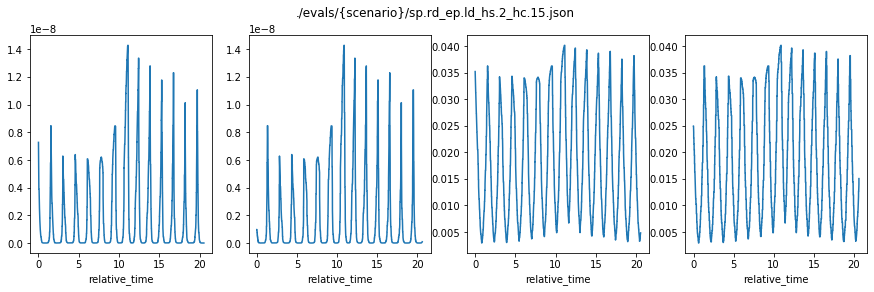

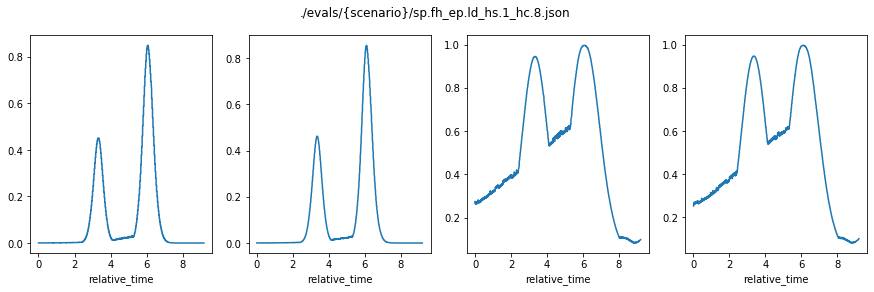

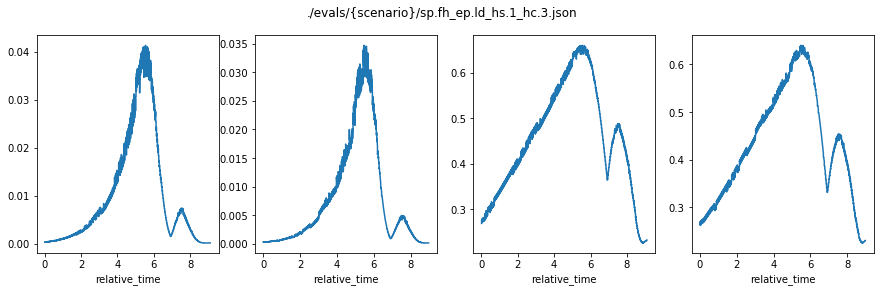

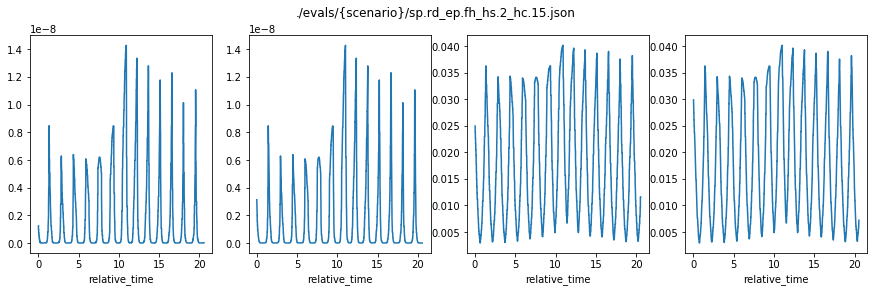

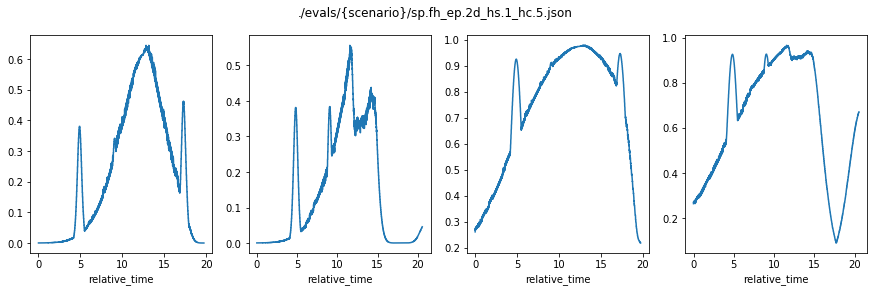

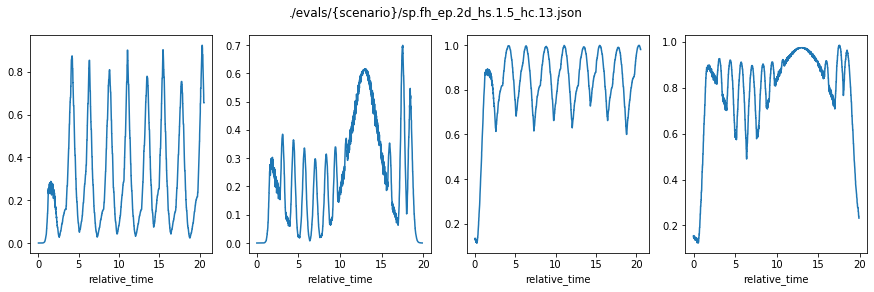

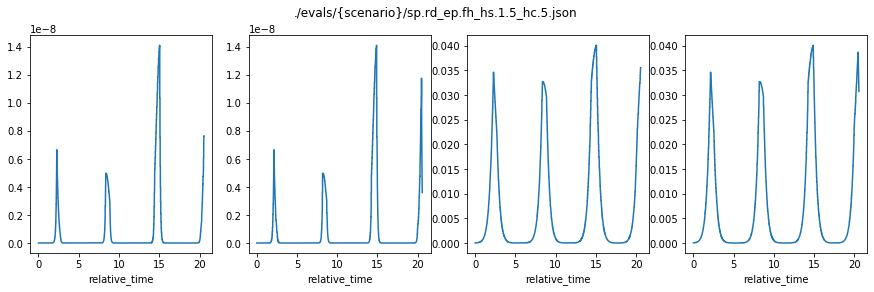

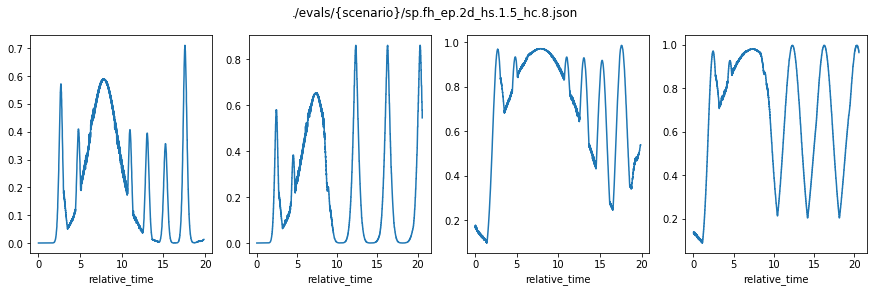

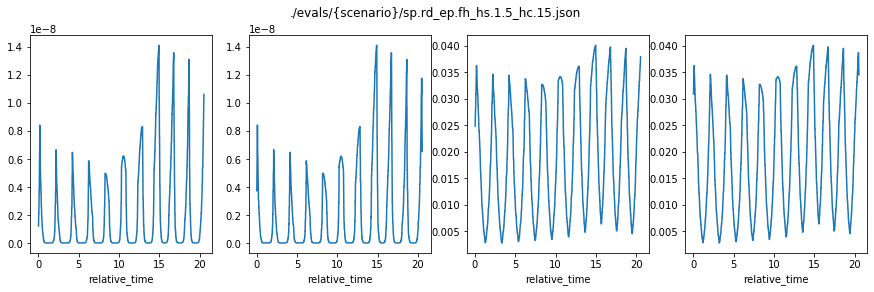

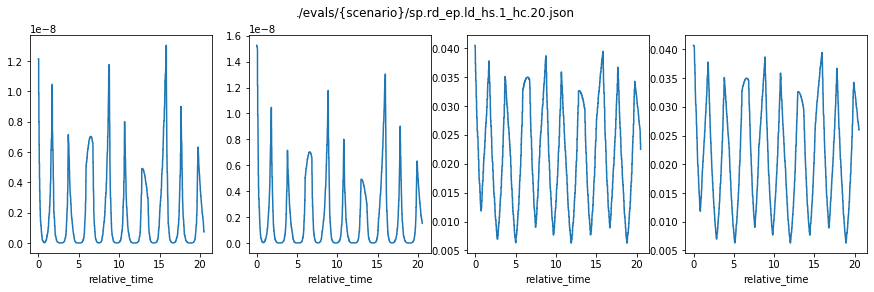

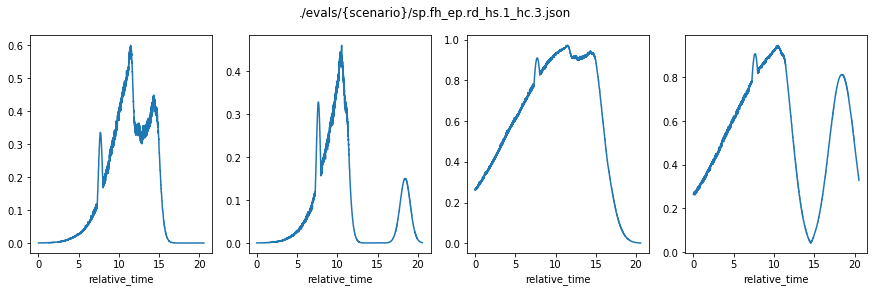

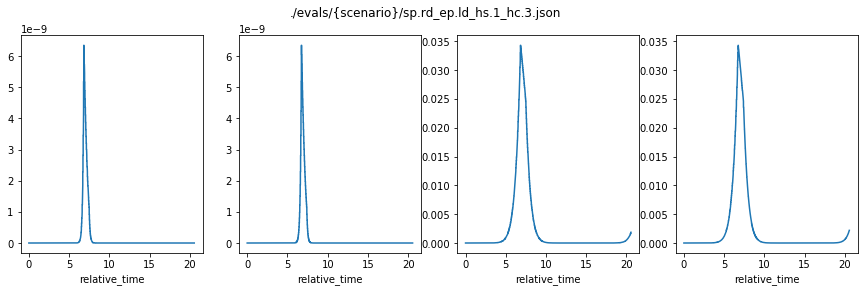

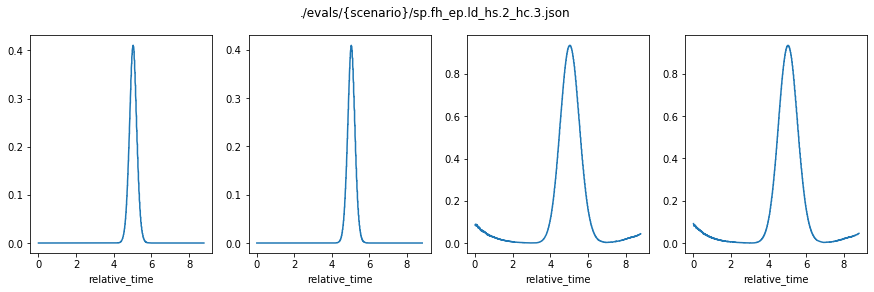

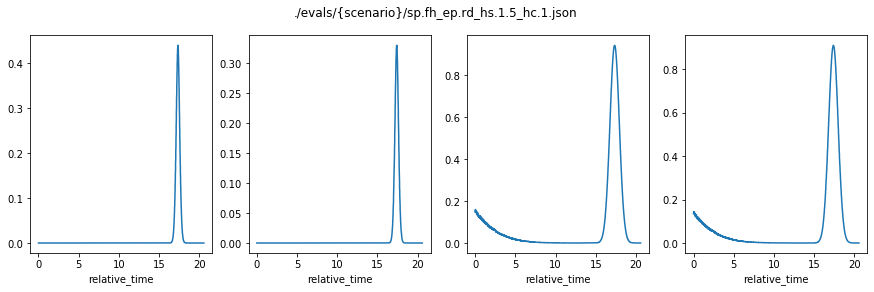

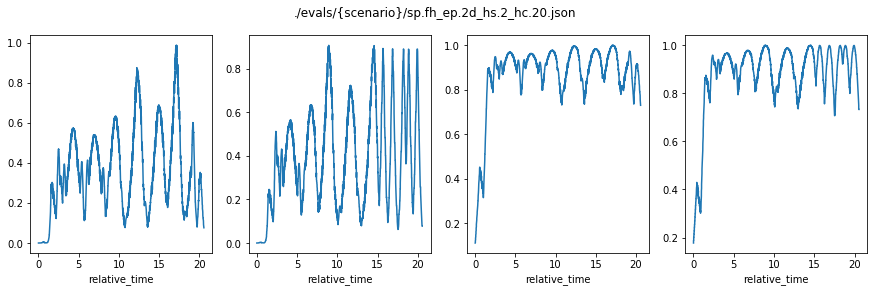

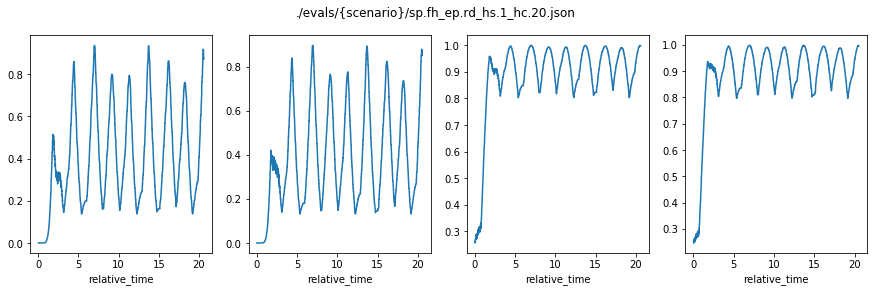

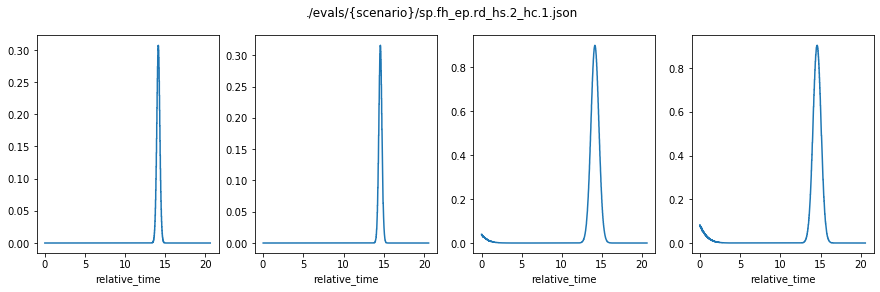

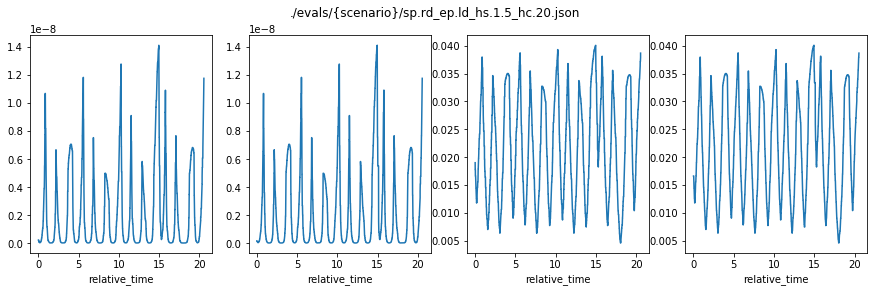

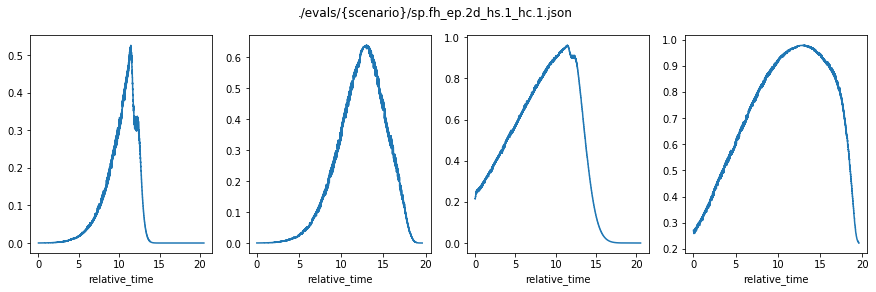

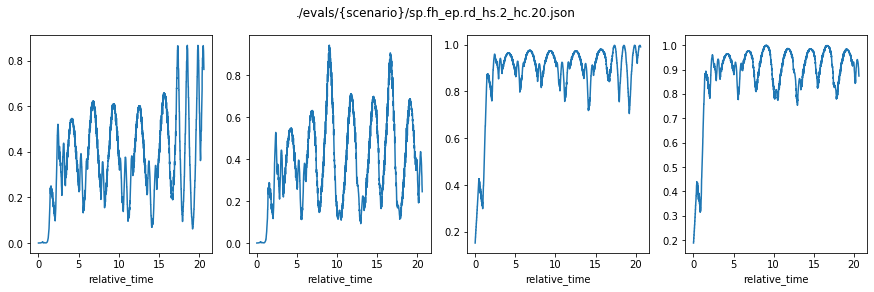

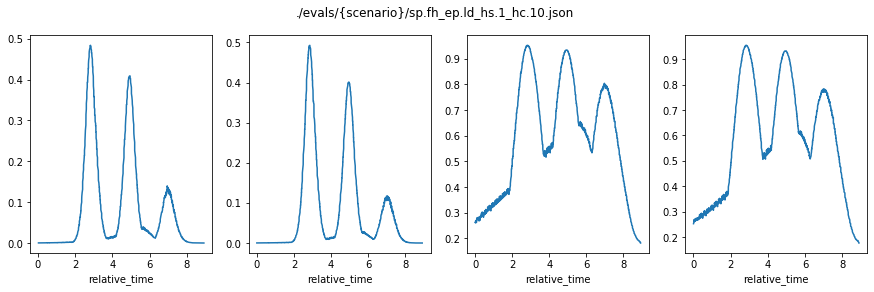

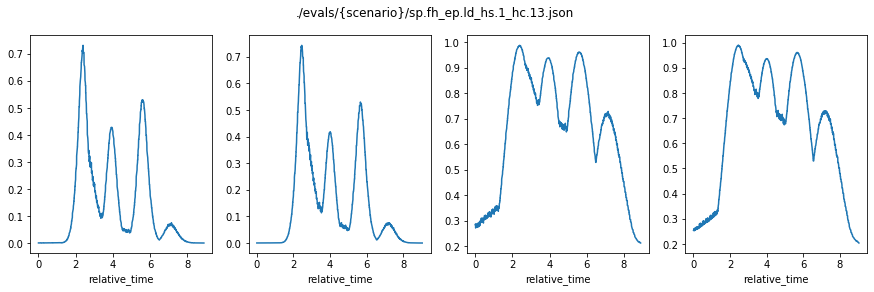

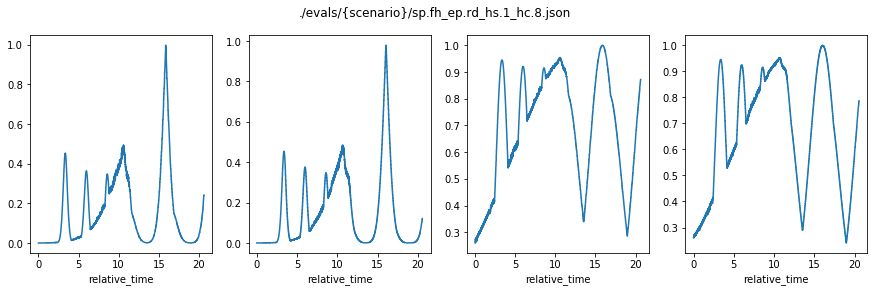

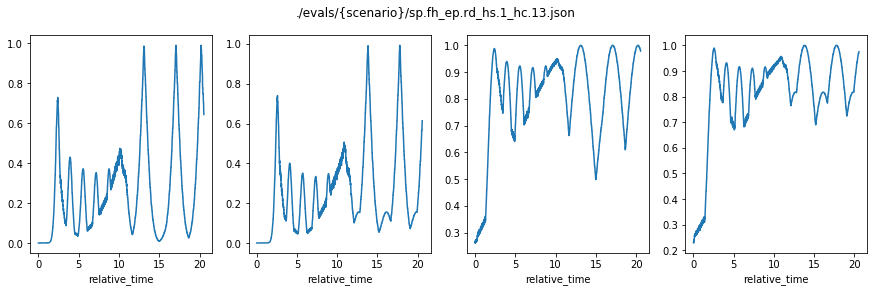

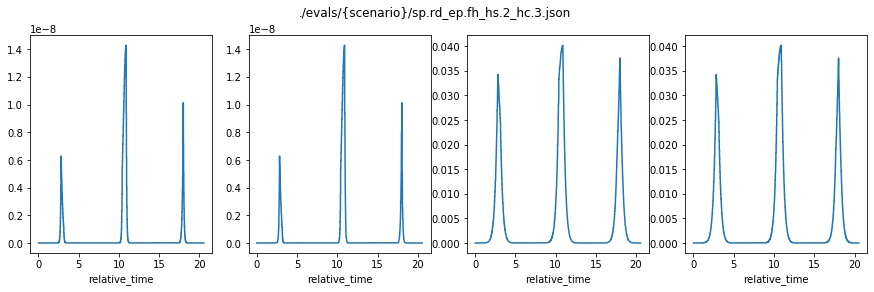

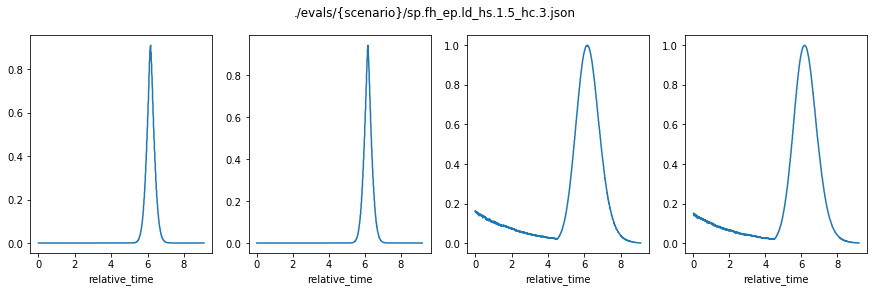

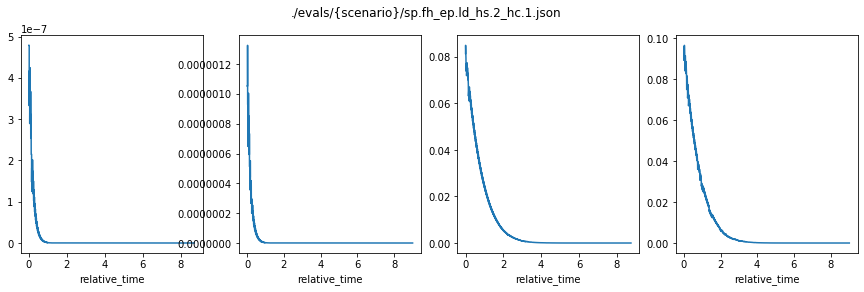

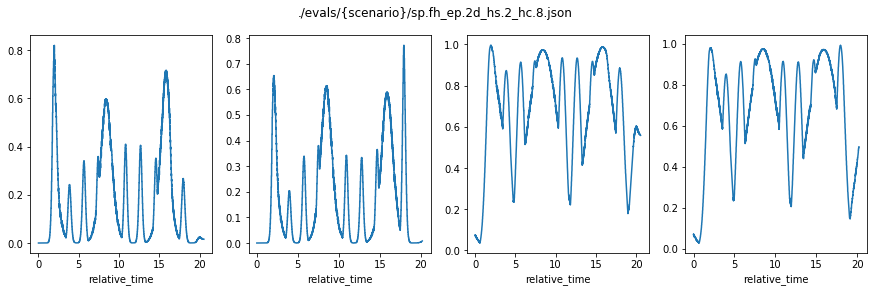

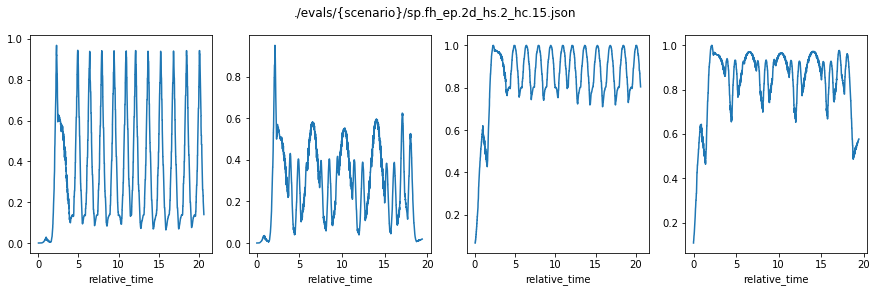

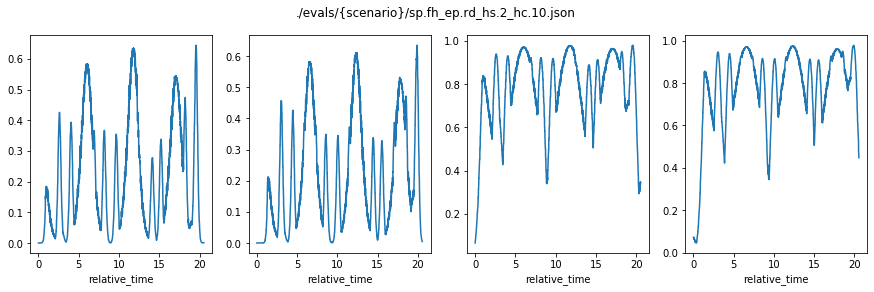

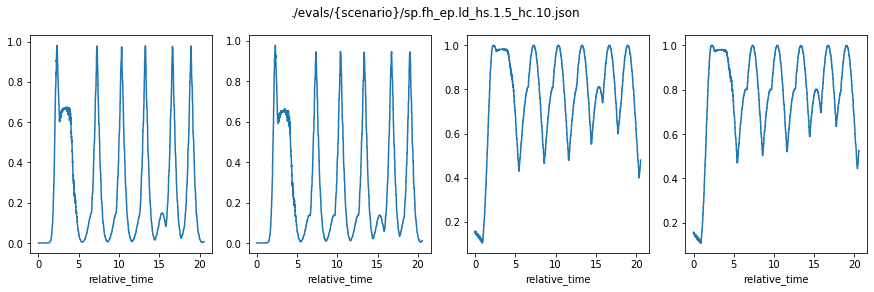

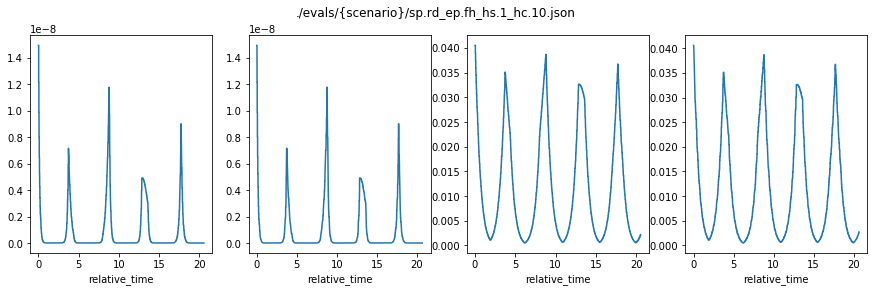

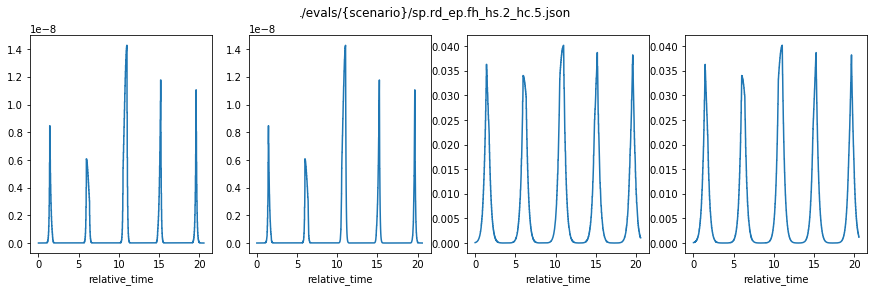

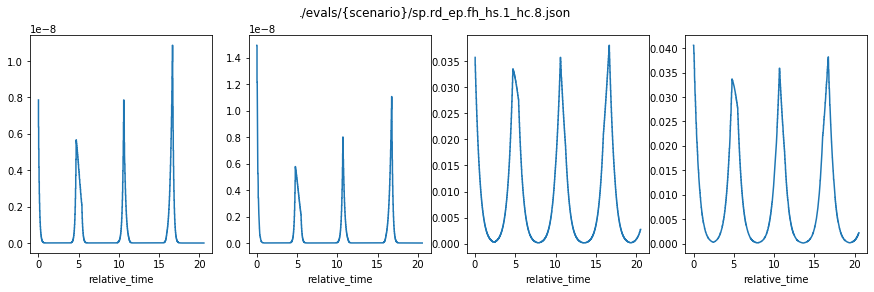

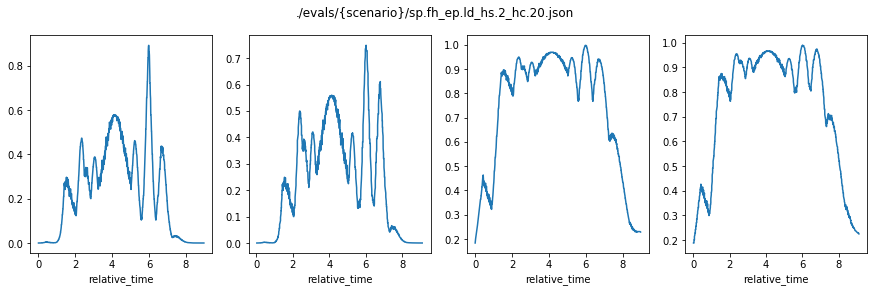

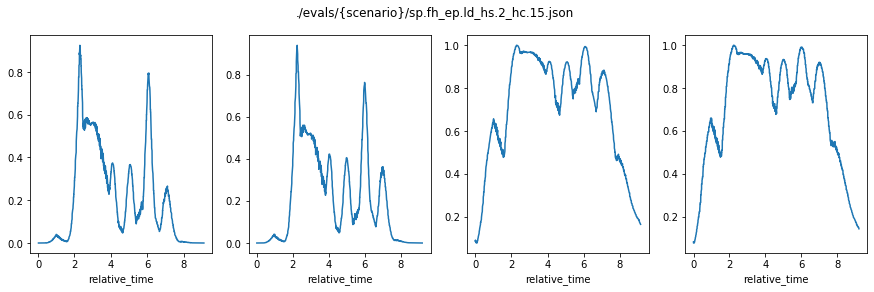

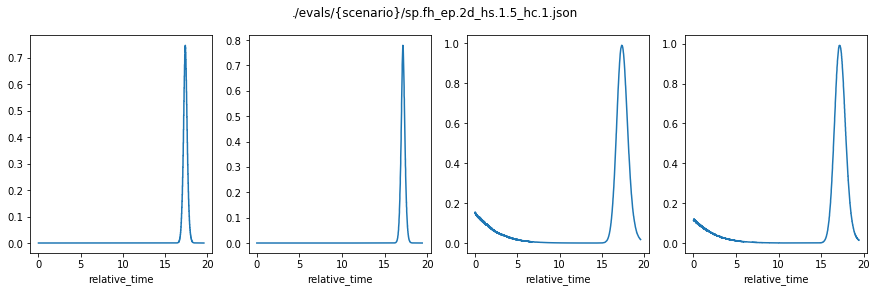

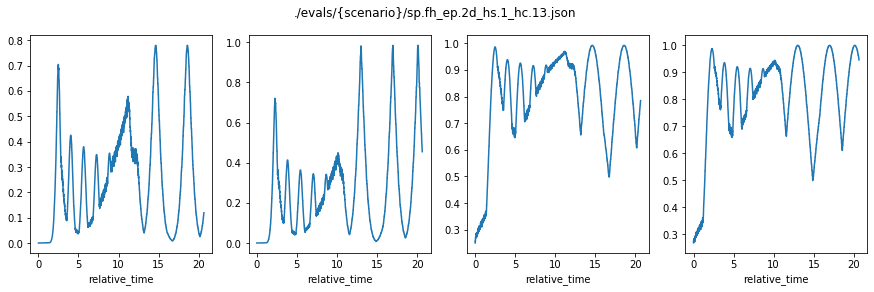

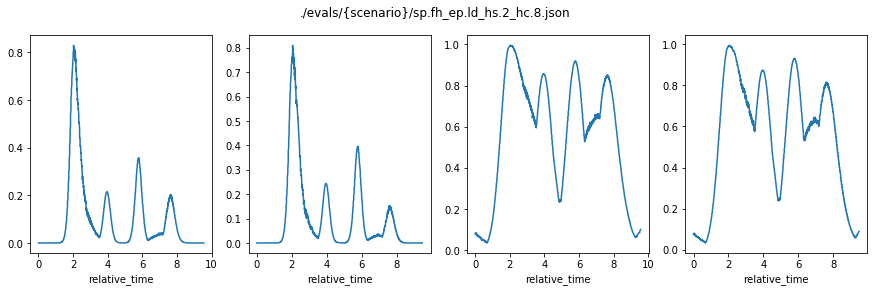

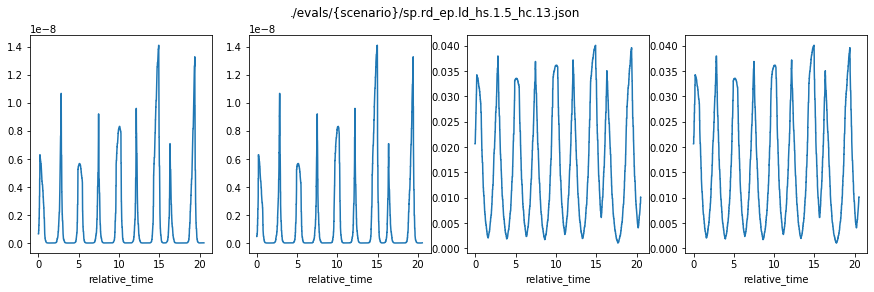

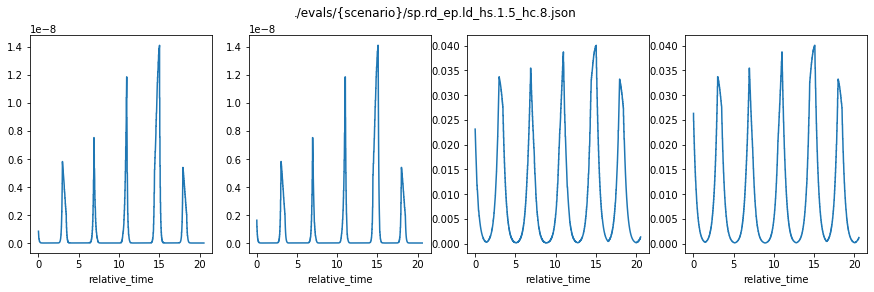

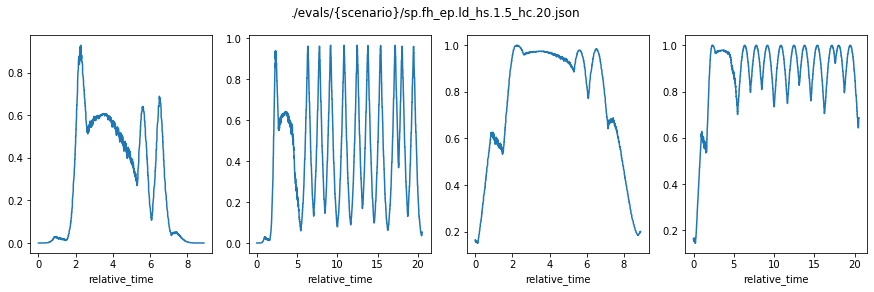

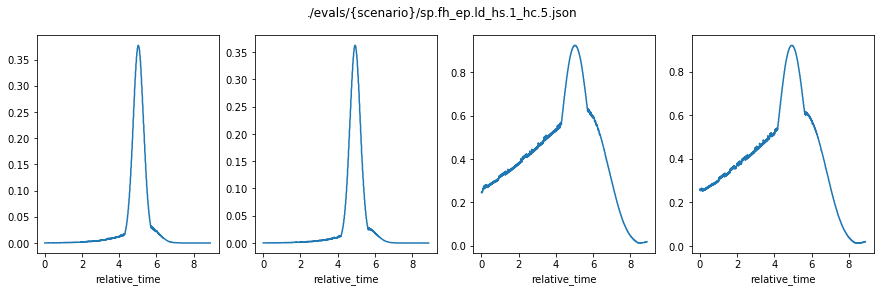

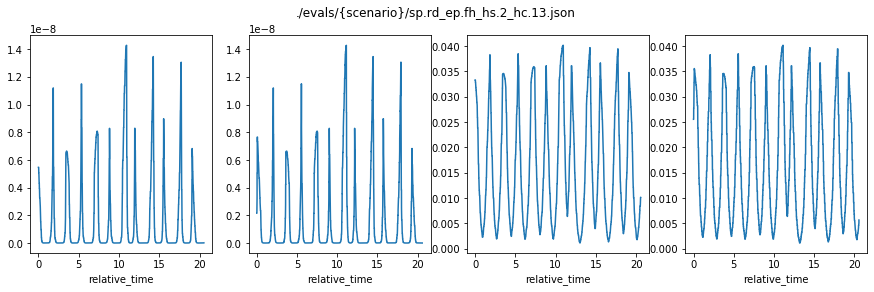

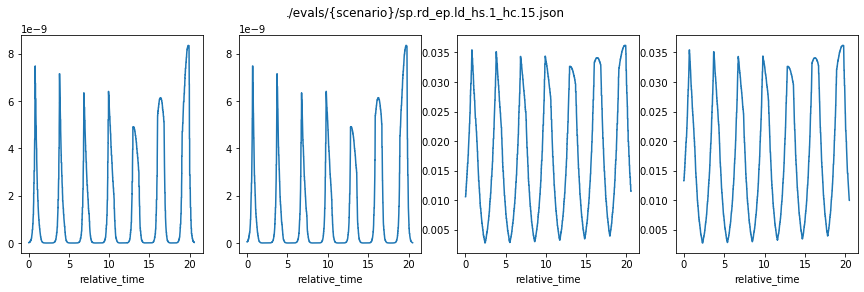

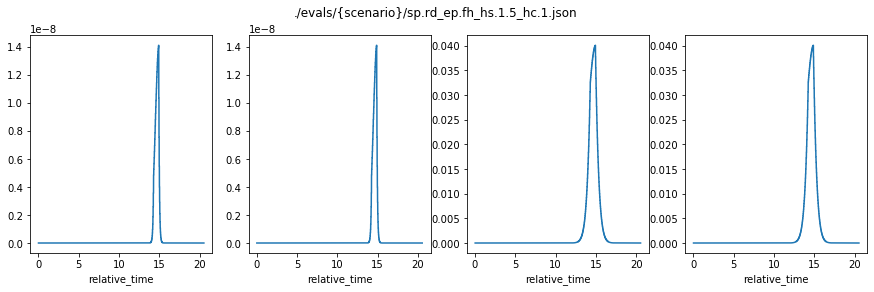

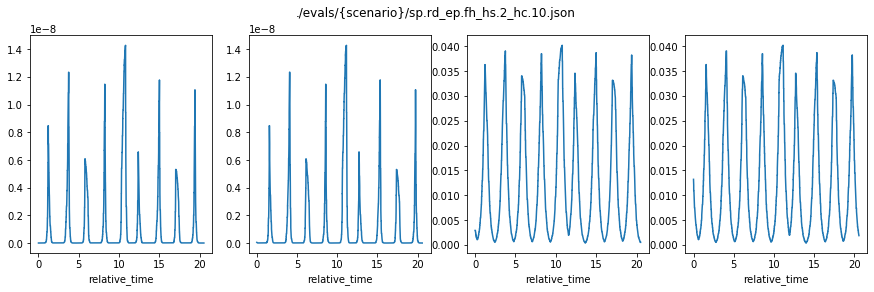

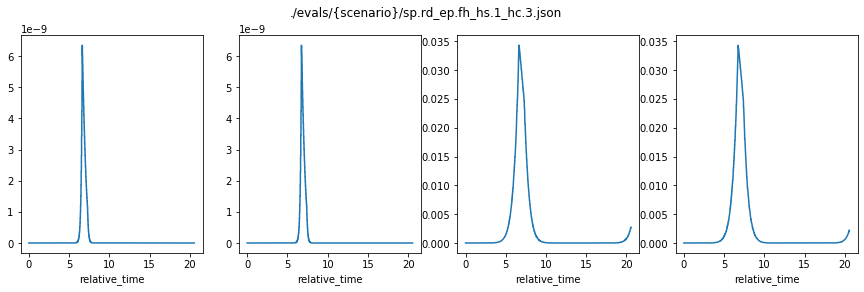

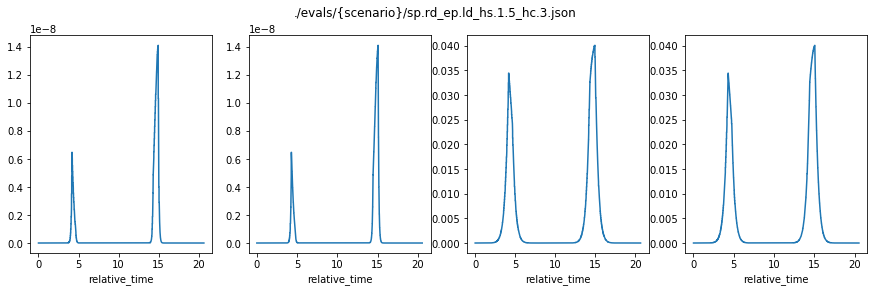

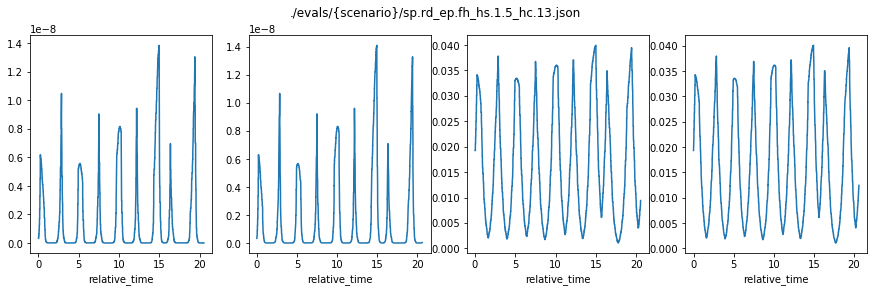

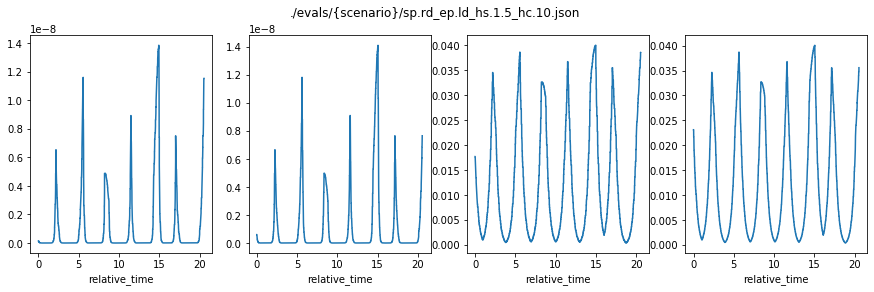

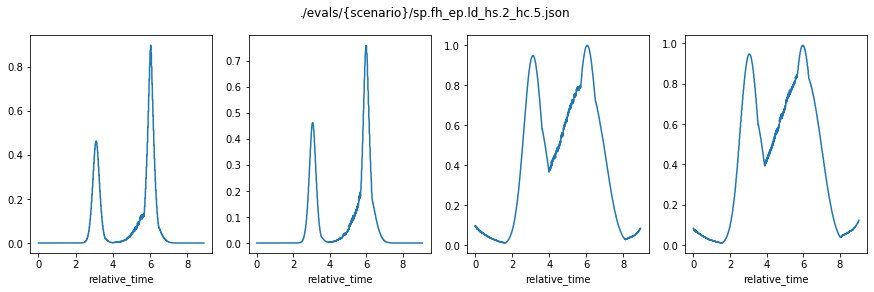

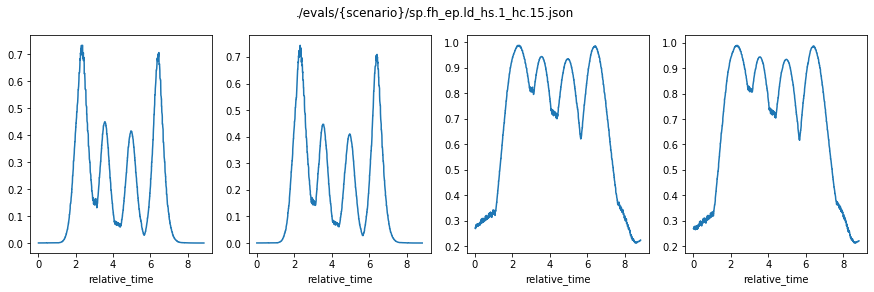

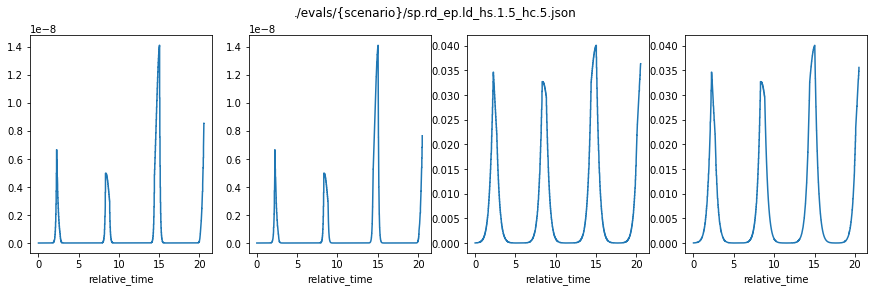

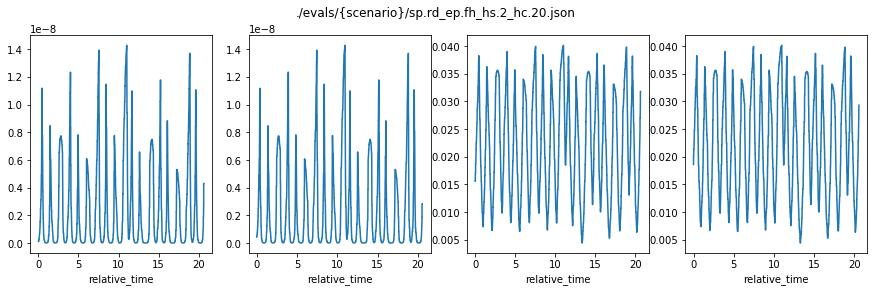

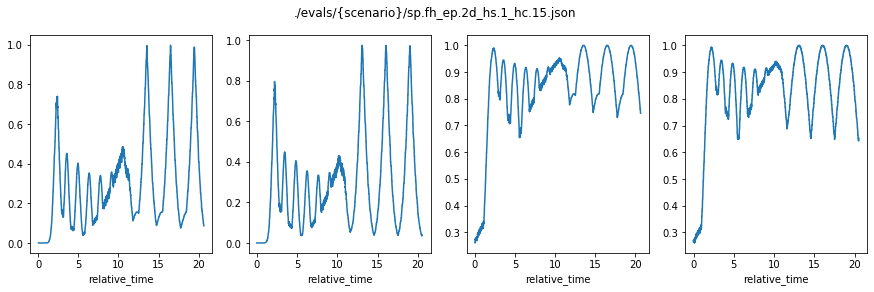

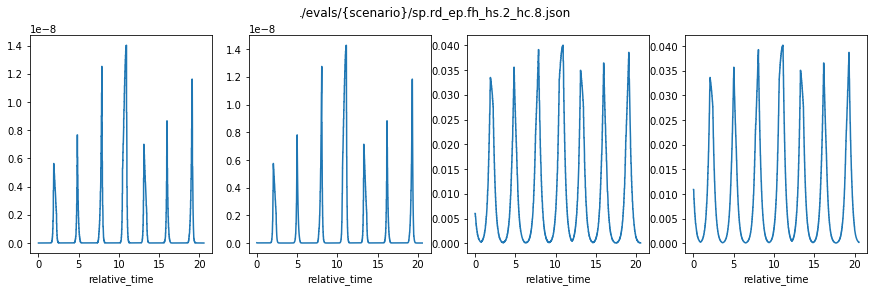

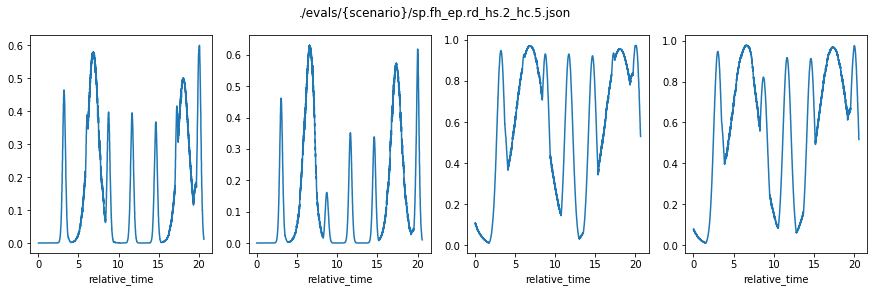

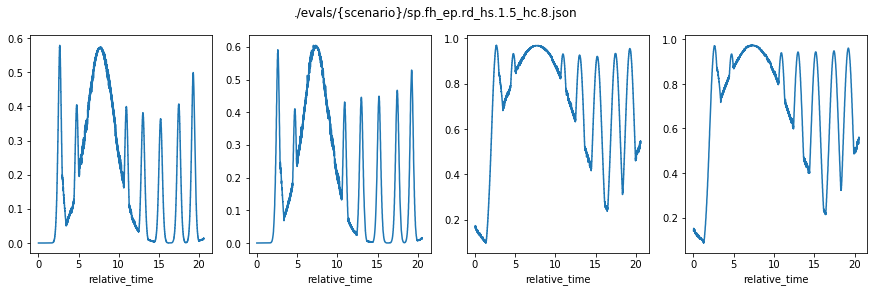

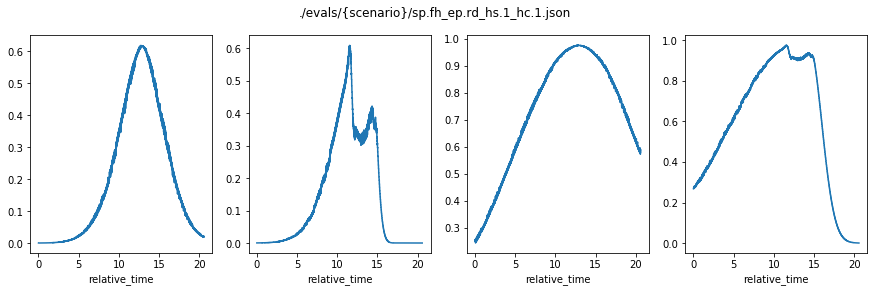

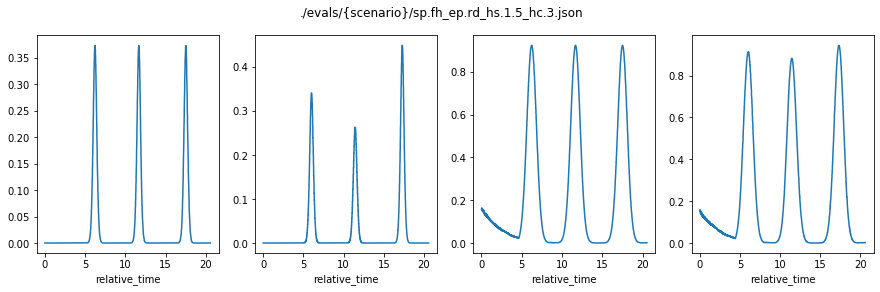

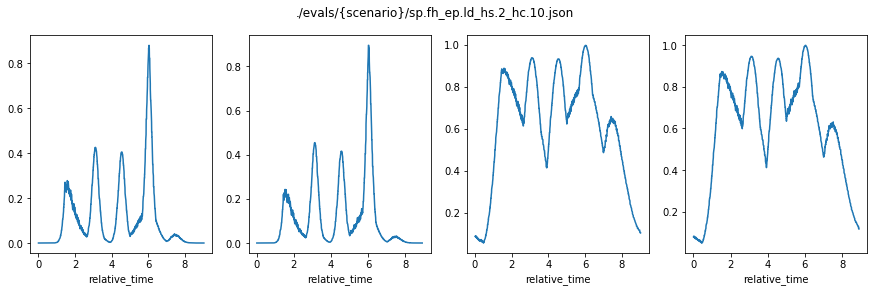

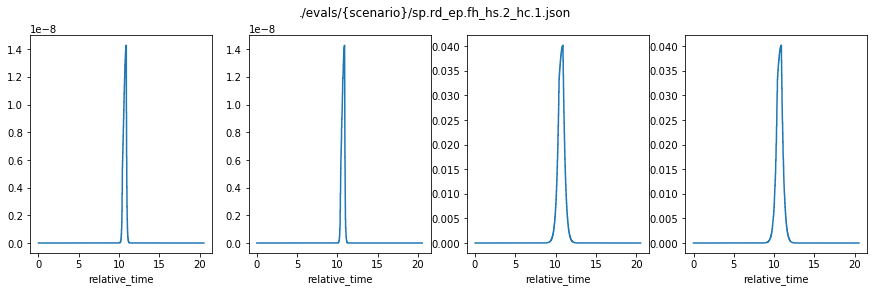

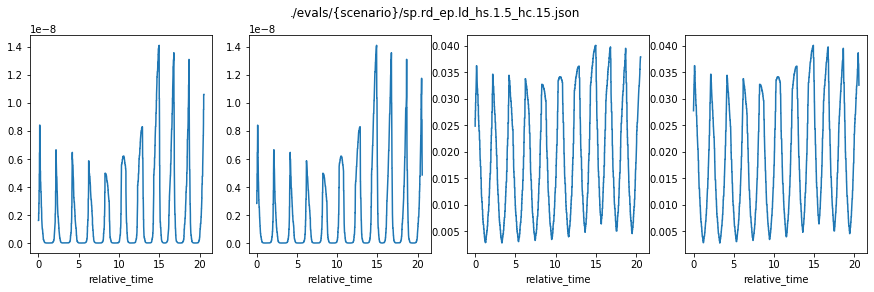

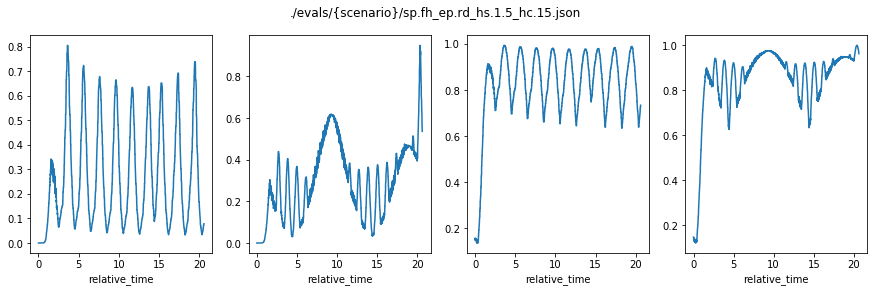

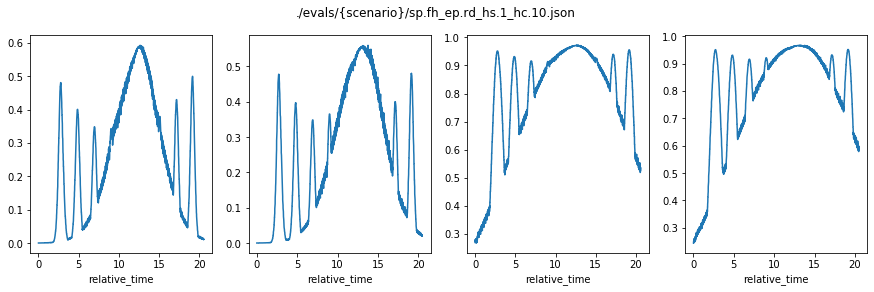

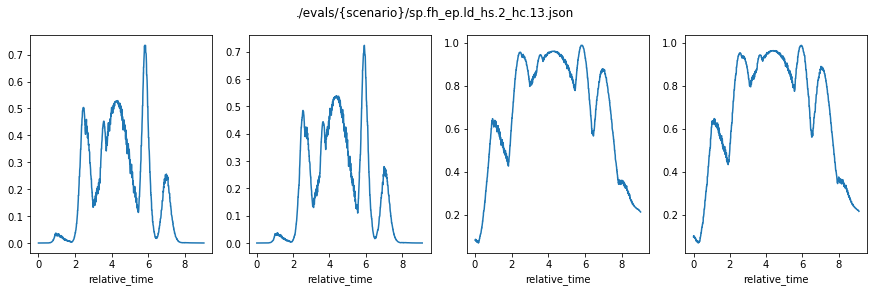

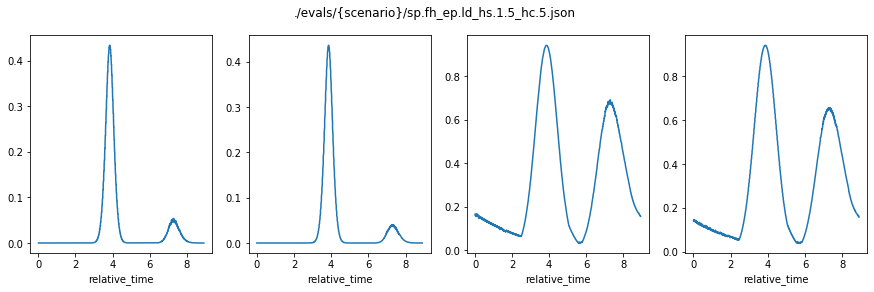

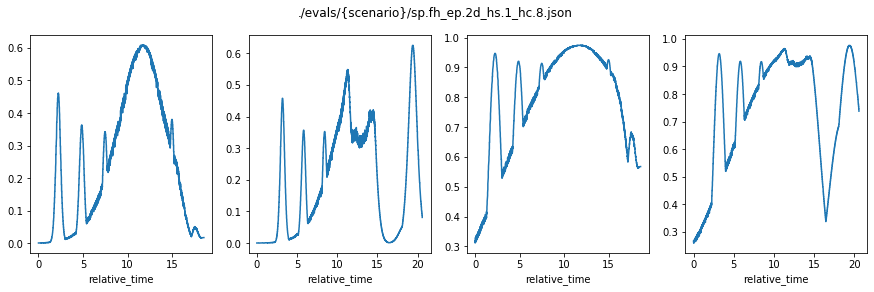

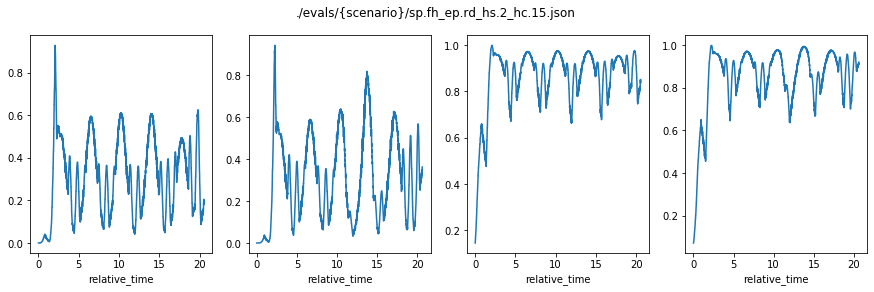

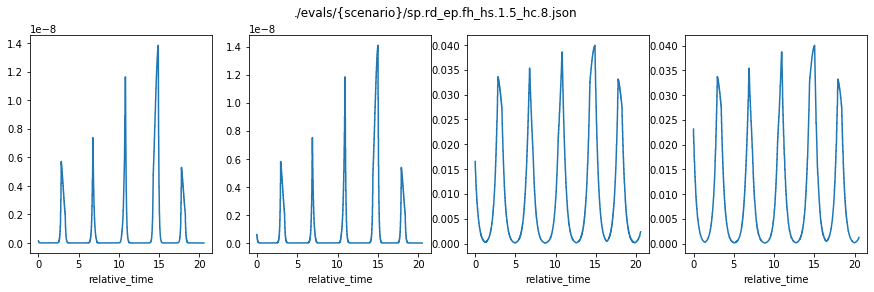

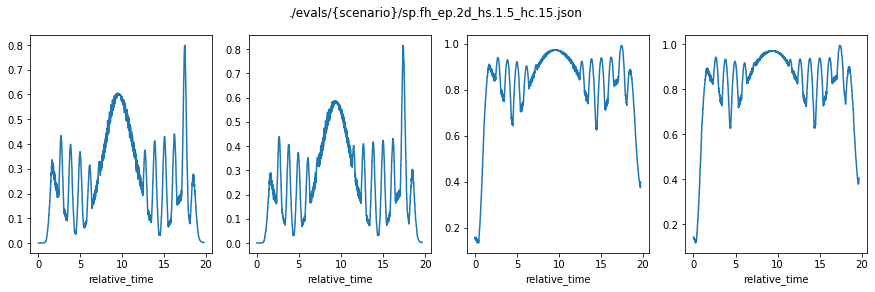

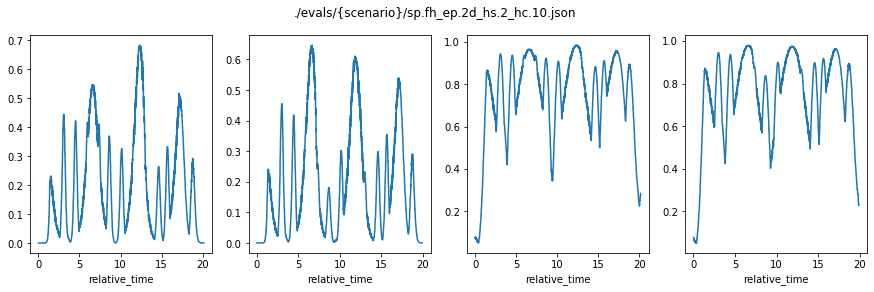

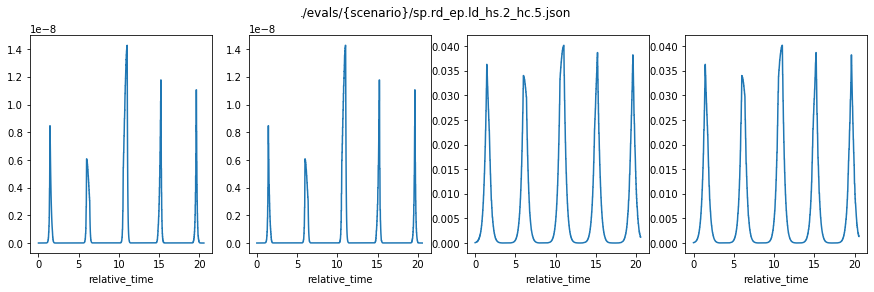

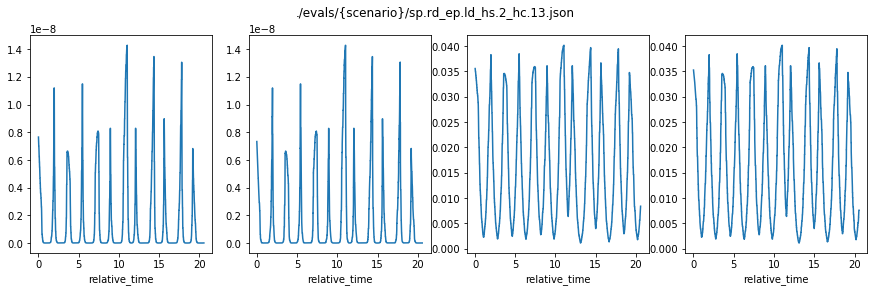

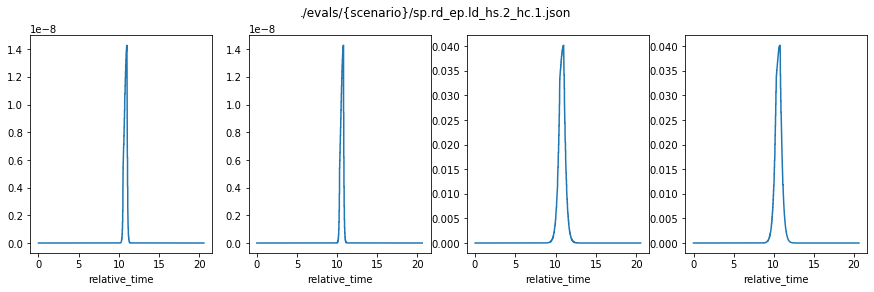

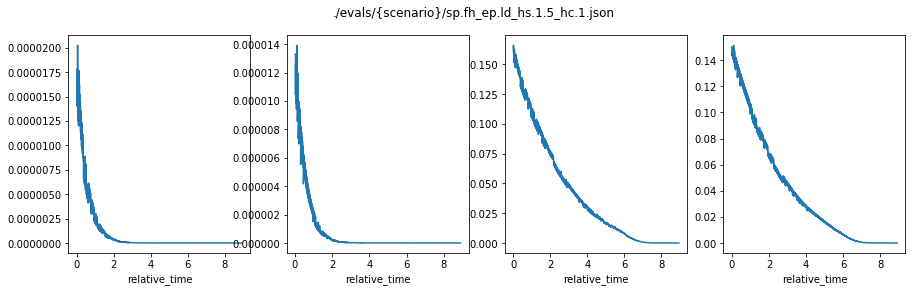

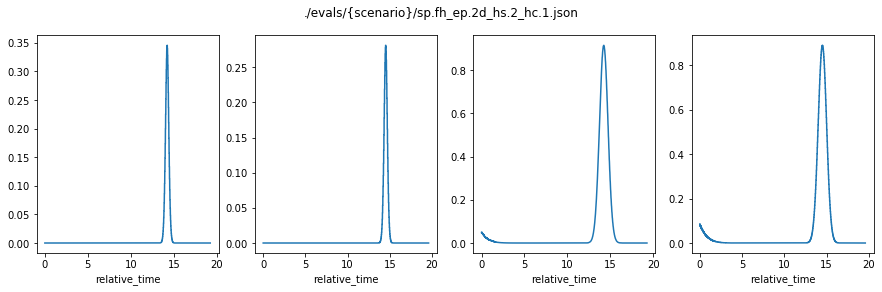

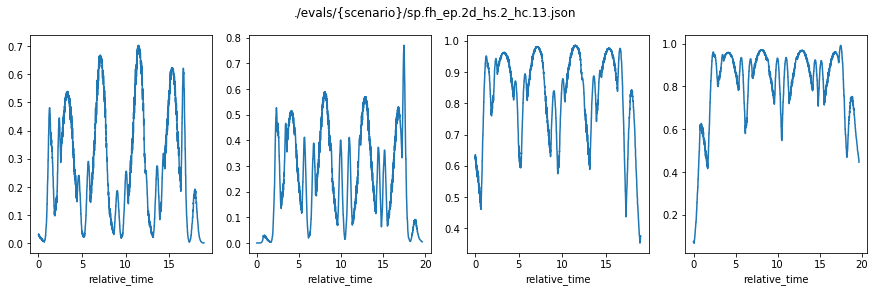

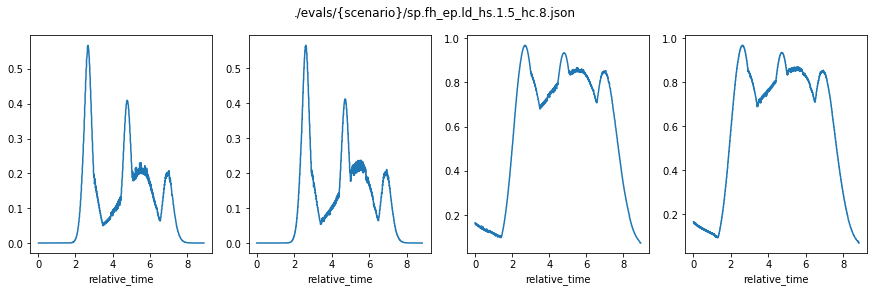

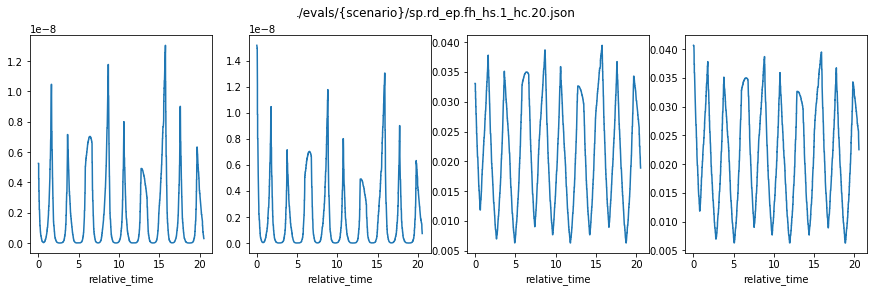

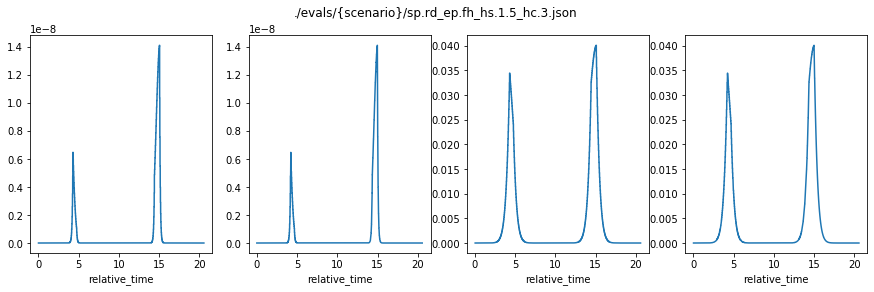

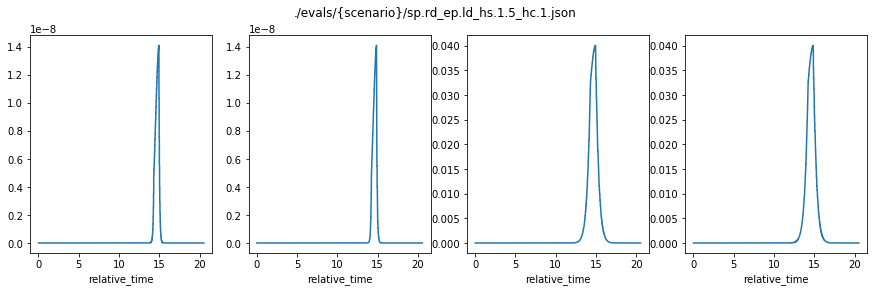

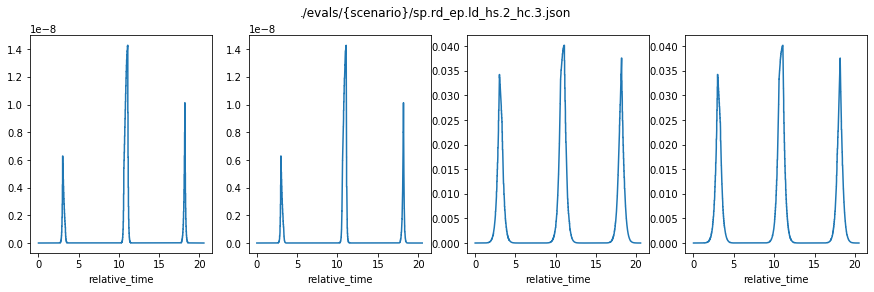

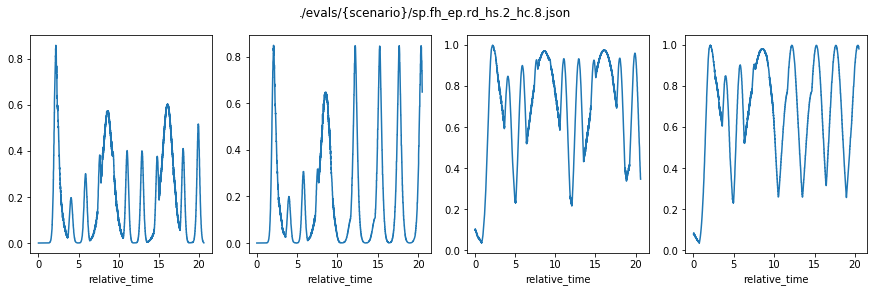

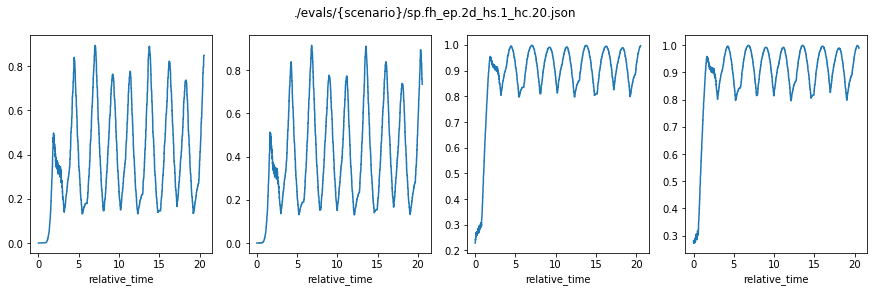

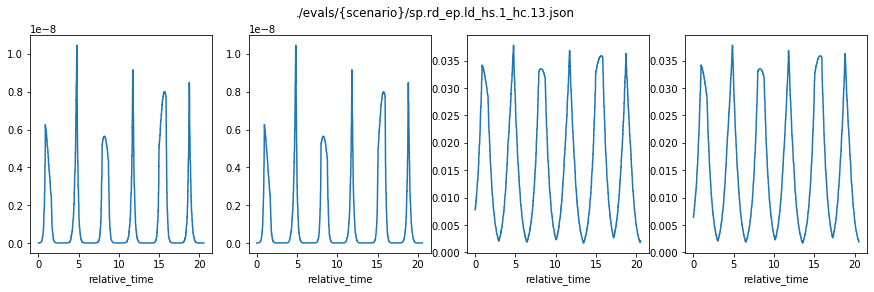

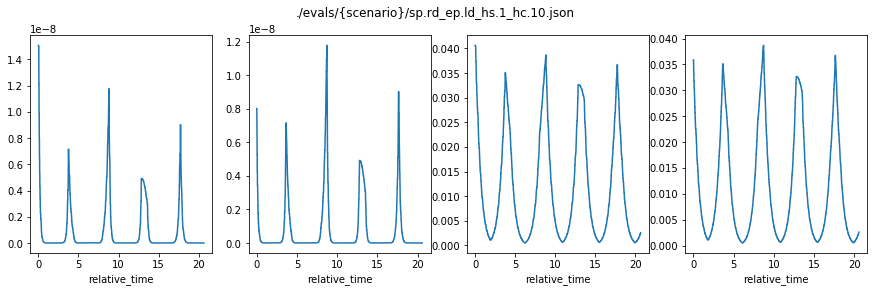

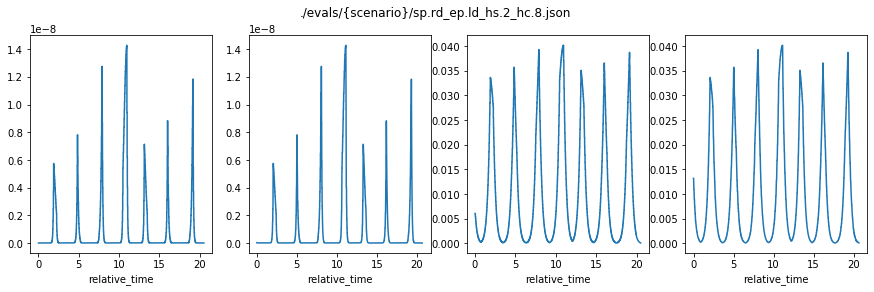

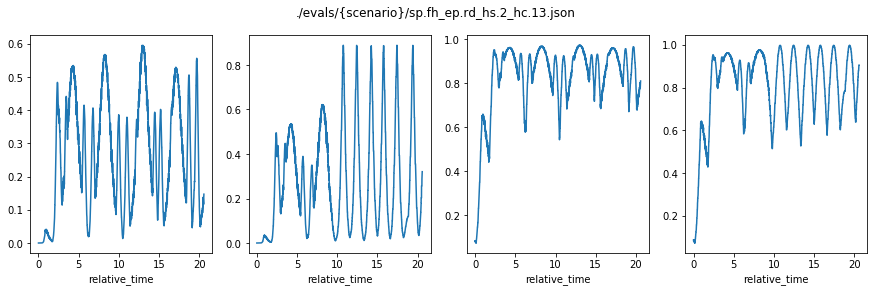

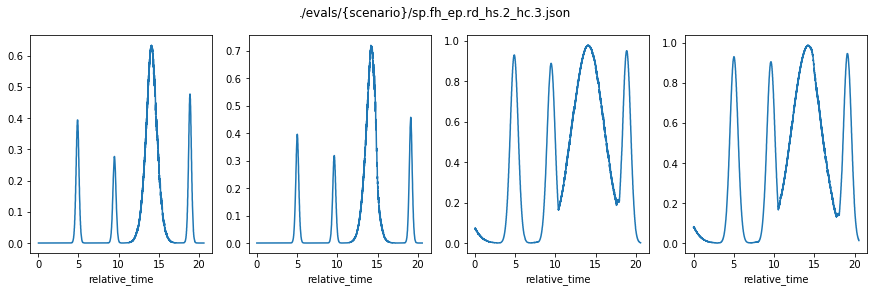

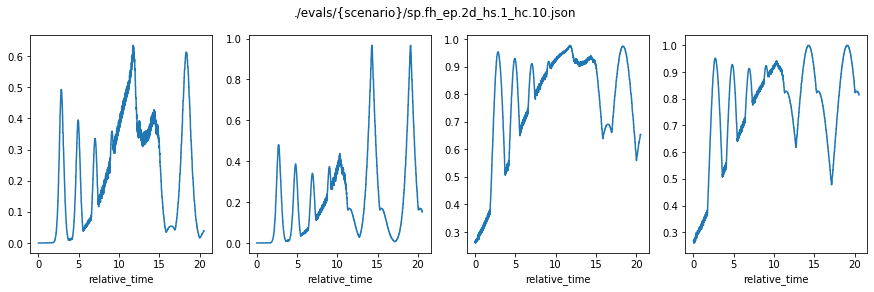

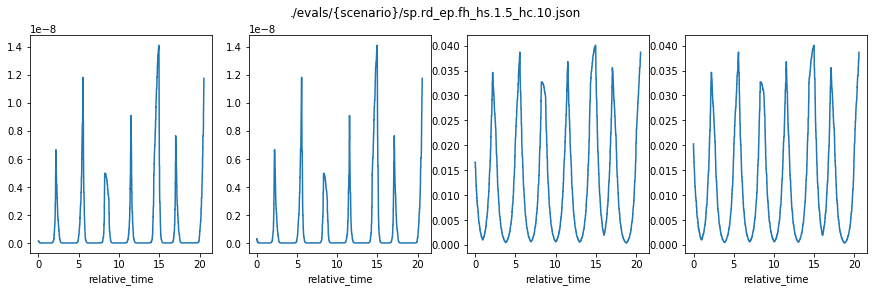

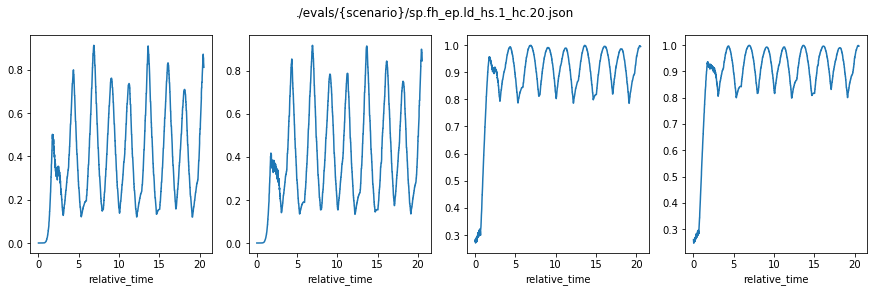

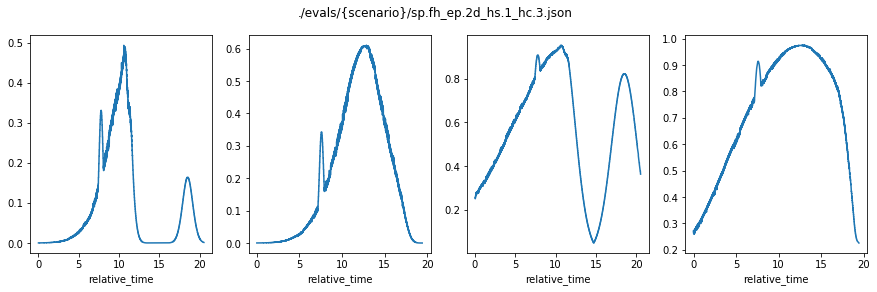

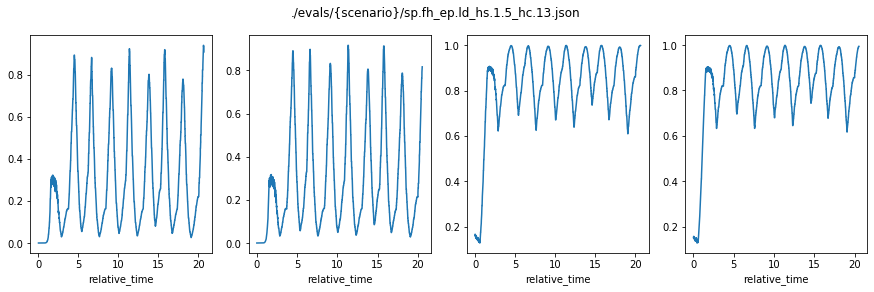

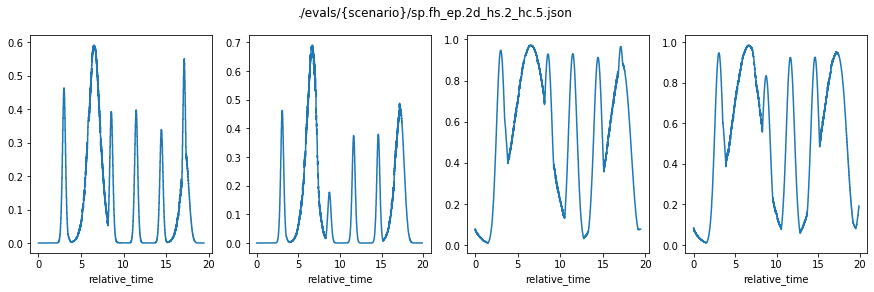

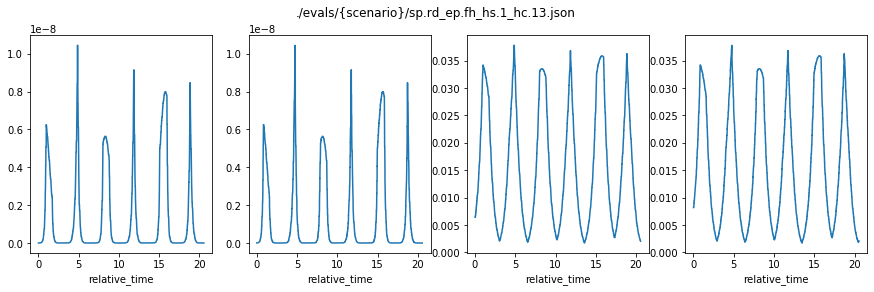

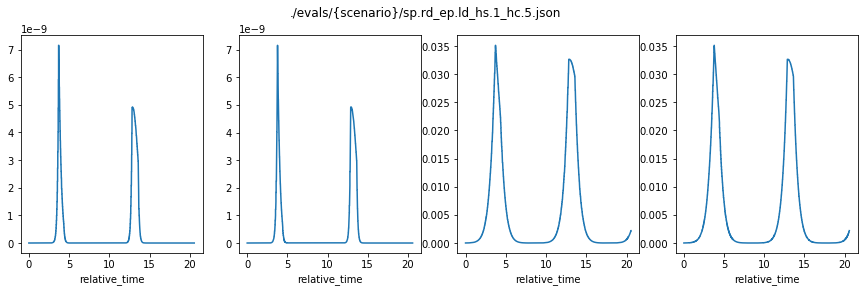

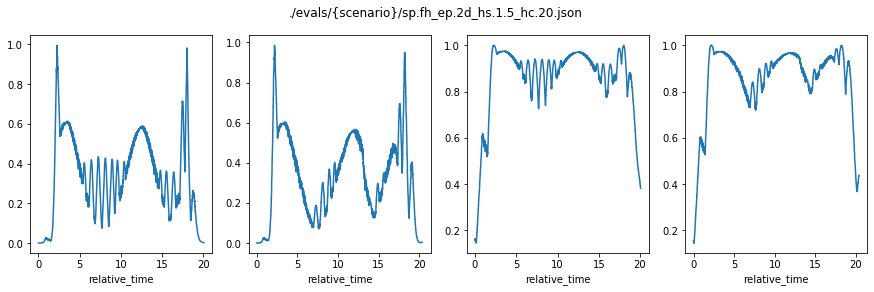

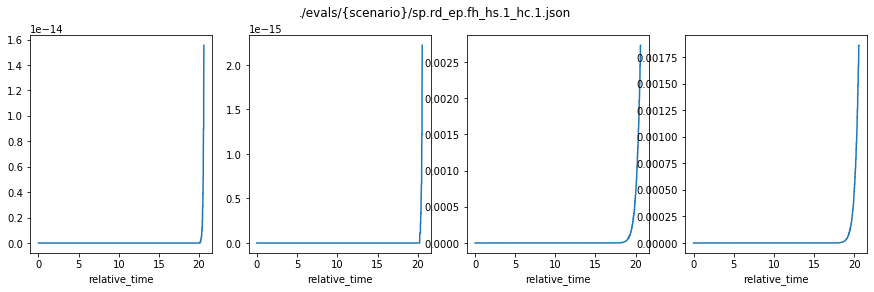

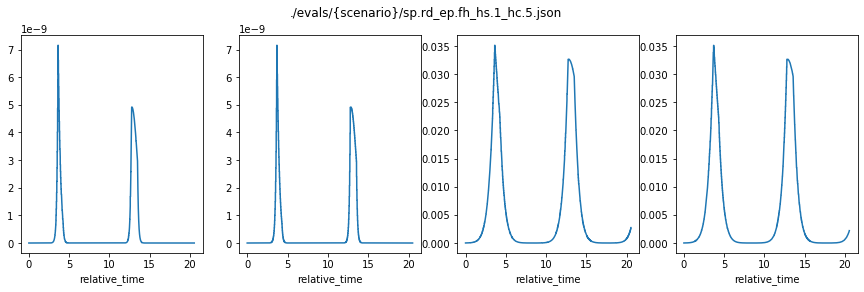

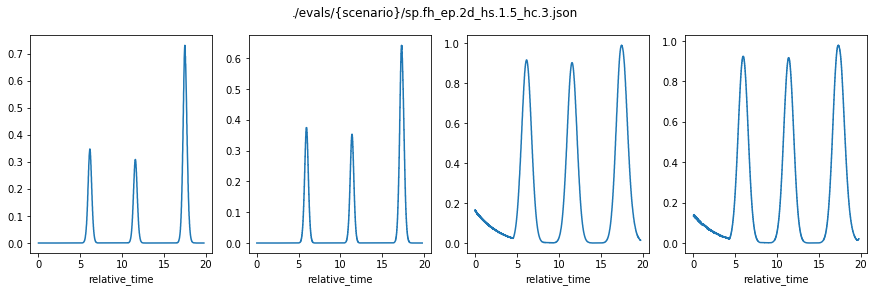

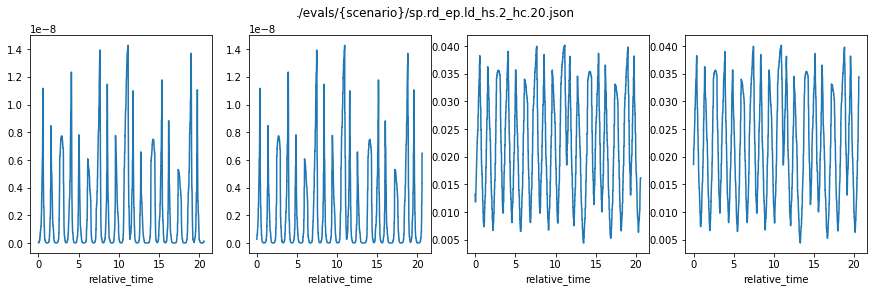

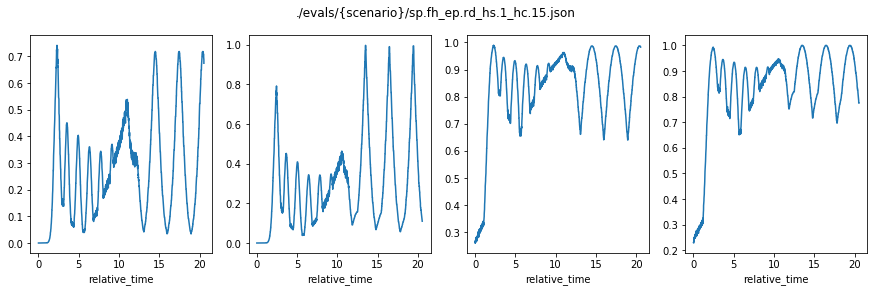

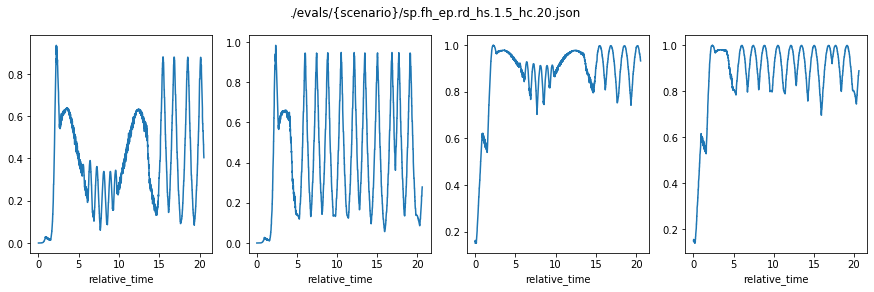

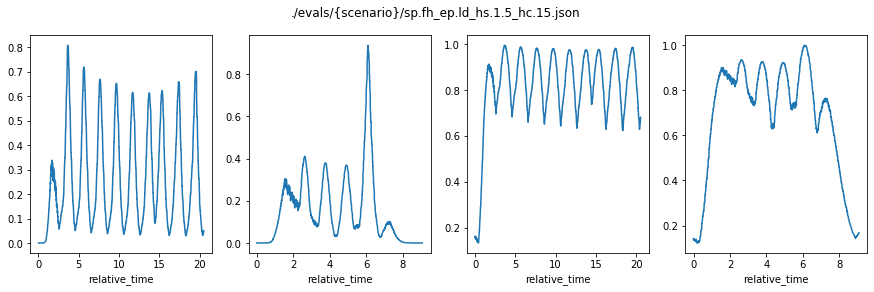

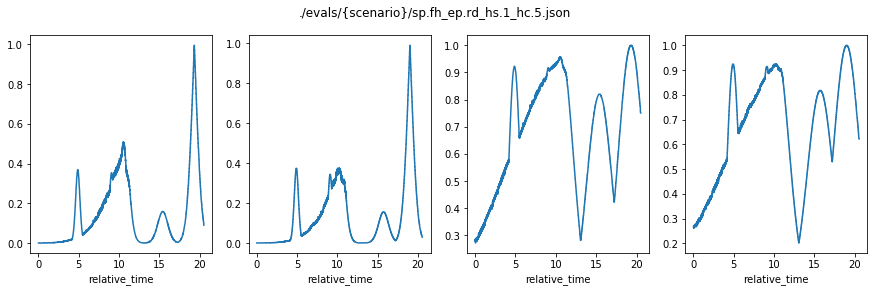

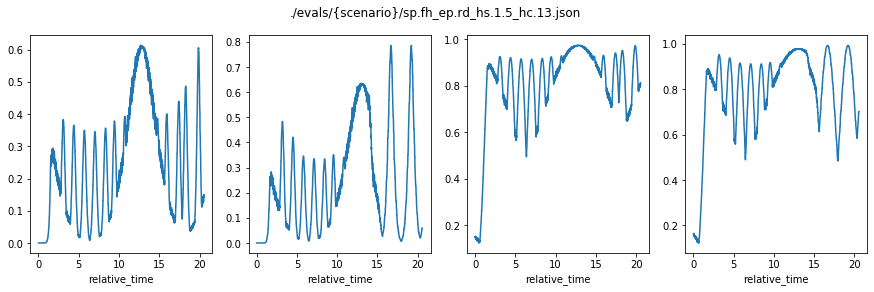

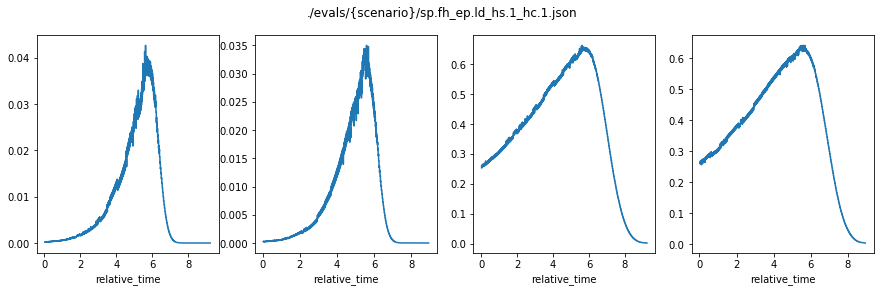

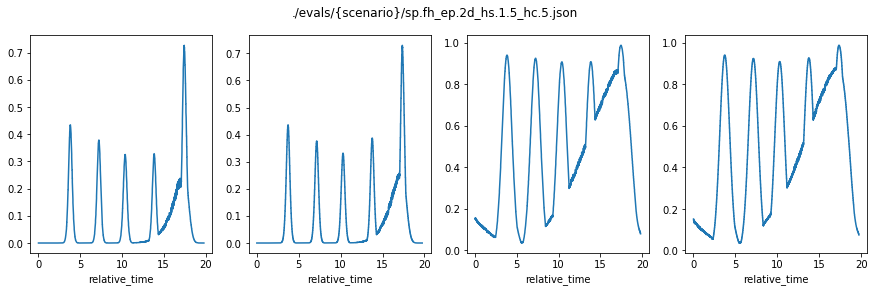

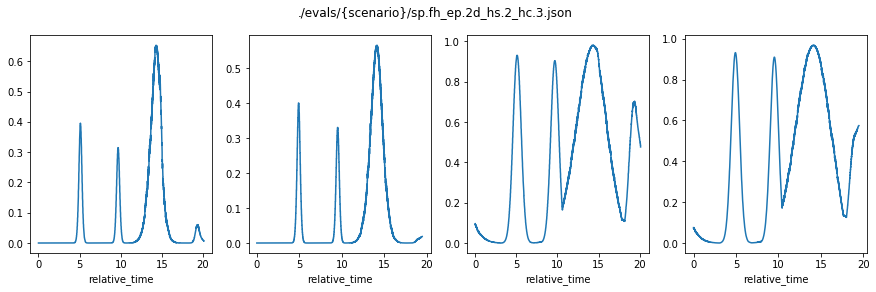

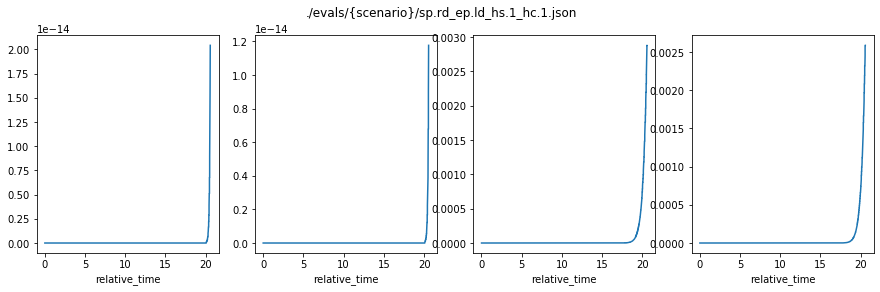

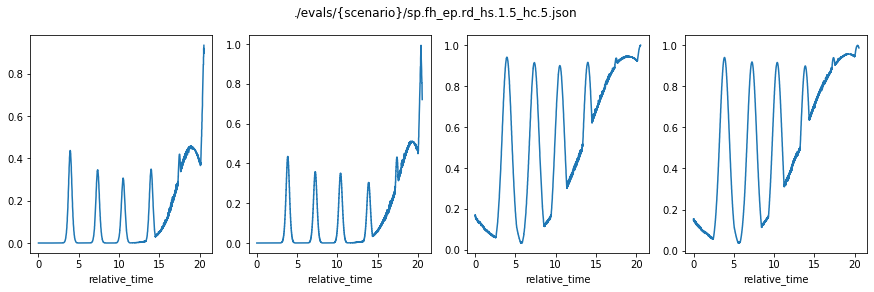

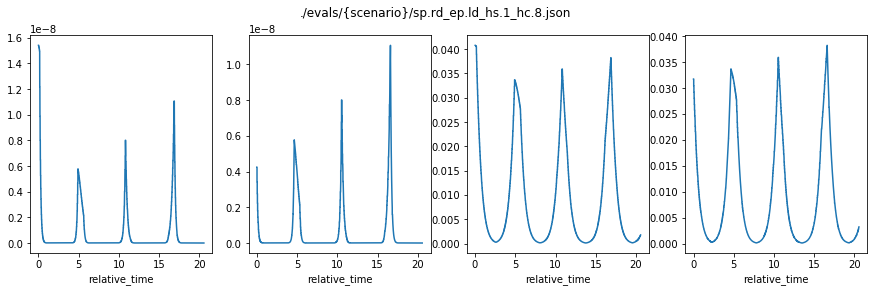

In [20]:
def compare_blames(file_format):
    df_go_alone = load_eval(file_format.format(scenario='go_alone_updated'))
    df_mpdm_ref = load_eval(file_format.format(scenario='mpdm_ref_2'))
    plt.figure(figsize=(15, 4))
    plt.suptitle(file_format)
    plt.subplot(1, 4, 1)
    plot_blame(df_go_alone)
    plt.subplot(1, 4, 2)
    plot_blame(df_mpdm_ref)
    plt.subplot(1, 4, 3)
    plot_force(df_go_alone)
    plt.subplot(1, 4, 4)
    plot_force(df_mpdm_ref)
    plt.show()

import os
files = os.listdir('./evals/mpdm_ref_2')

for file in files:
    file_format = './evals/{scenario}/' + file
    compare_blames(file_format)